In [ ]:
#Avance 1 
#Comenzamos con la importación de las librerías que utilizaremos para la carga y limpieza de datos
import numpy as np
import pandas as pd

In [ ]:
# Este código copia la ruta del csv otorgado y lo convierte a un dataset llamado df_bio
# Desde la importación de los datos, con parse_dates nos aseguramos que la columna "date" sea de tipo fecha
archivo_bio = r'C:\Users\lucas\OneDrive\Escritorio\M4-Henry\data_latinoamerica.csv'
df_bio = pd.read_csv(archivo_bio, parse_dates=["date"])

In [ ]:
# Con la función .info(0) podemos observar que tenemos 12216057 filas y 50 columnas (la cantidad exacta que se nos había indicado)
print(df_bio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


In [ ]:
#Como paso previo a filtrar por los países solicitados, hacemos una lista de todos los países que contiene el data set
df_bio["country_name"].unique()



array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico',
       'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela'], dtype=object)

In [ ]:
# Esta parte de código crea una lista con los países solicitados y, luego, filtra el data frame
# Para corroborar que el código hace lo deseado, se vuelve a utilizar el .info() para corroborar que sigue el mismo número de columnas, pero con menos filas
paises =["Argentina", "Chile", "Colombia","Peru","Brazil","Mexico"]
df_bio =df_bio[df_bio['country_name'] .isin(paises)]
df_bio.info()



<class 'pandas.core.frame.DataFrame'>
Index: 11970289 entries, 0 to 12136776
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       
 13  

In [ ]:
# Tras volver a corroborar el tipo de dato de date, aplicamos un filtro de fechas para quedarnos con todas aquellas posteriorer al 1 de enero 2021
# Hacemos un print para ver la totalidad de las columnas del dataset
df_bio['date'].dtype

df_bio = df_bio[df_bio['date'] > '2021-01-01']


pd.set_option('display.max_columns', None)
print(df_bio.head())







    location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina         7767.0   
368           AR 2021-01-03           AR    Argentina         4934.0   
369           AR 2021-01-04           AR    Argentina        13953.0   
370           AR 2021-01-05           AR    Argentina        14085.0   
371           AR 2021-01-06           AR    Argentina        14496.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  population_male  \
367                                20334.0  44938712.0       19523766.0   
368                             

In [ ]:
# Corroboramos que el código hizo lo deseado al comprobar que tenemos la misma cantidad de columnas pero menos filas que en el filtro anterior
print(df_bio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7537296 entries, 367 to 12136776
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       
 13 

In [ ]:

#Limpieza de datos
# El siguiente código nos muestra, por país, la cantidad de na que hay en cada columna. Nuestro objetivo es lograr un data frame sin valores na. Esto se reflejaría en que el cuadro de abajo se complete todos de 0 (no hay na)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_bio.groupby('country_name').apply(lambda x: x.isna().sum())



C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\948379402.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bio.groupby('country_name').apply(lambda x: x.isna().sum())


location_key  date  country_code  country_name  new_confirmed  \
country_name                                                                  
Argentina                0     0             0             0          83546   
Brazil                   0     0             0             0          17281   
Chile                    0     0             0             0         154730   
Colombia                 0     0             0             0         495068   
Mexico                   0     0             0             0        1416447   
Peru                     0     0             0             0         992812   

              new_deceased  cumulative_confirmed  cumulative_deceased  \
country_name                                                            
Argentina            83546                 83546                83546   
Brazil               19940                 17281                19940   
Chile               154730                154730               154730   
Colombia            495068                495068               495068   
Mexico             1416447               1416447              1416447   
Peru                992812                992812               992812   

              cumulative_vaccine_doses_administered  population  \
country_name                                                      
Argentina                                    105842        2496   
Brazil                                      3487425           0   
Chile                                        225901           0   
Colombia                                     710913      322608   
Mexico                                      1558345        3120   
Peru                                        1185643           0   

              population_male  population_female  population_rural  \
country_name                                                         
Argentina                2496               2496            339456   
Brazil                   3120               3120           3503760   
Chile                       0                  0            225888   
Colombia               695760             695760            720720   
Mexico                   5616               5616           1558128   
Peru                        0                  0           1185600   

              population_urban  population_density  human_development_index  \
country_name                                                                  
Argentina               339456              339456                   339456   
Brazil                 3503760             3503760                    48672   
Chile                   225888              225888                   225888   
Colombia                720720              720720                   718848   
Mexico                 1558128             1558128                  1557504   
Peru                   1185600             1185600                  1184976   

              population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                     2496                  2496   
Brazil                        3120                  3120   
Chile                       215904                215904   
Colombia                    695760                695760   
Mexico                        5616                  5616   
Peru                             0                     0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                     2496                  2496   
Brazil                        3120                  3120   
Chile                       215904                215904   
Colombia                    695760                695760   
Mexico                        5616                  5616   
Peru                             0                     0   

              population_age_40_49  population_age_50_59  \
country_name                               

In [ ]:
# Esta es la parte más importante de todo el código para la consistencia del análisis
# Se crean varias listas tituladas según el método utilizado para el remplazo de sus na

remplazo_ffill = [
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered",
    "cumulative_recovered"
]

remplazo_mean = [
       "population",
    "population_male",
    "population_female",
    "population_rural",
    "population_urban",
    "population_density",
   
    "human_development_index",
    "population_age_00_09",
    "population_age_10_19",
    "population_age_20_29",
    "population_age_30_39",
    "population_age_40_49",
    "population_age_50_59",
    "population_age_60_69",
    "population_age_70_79",
    "population_age_80_and_older",
    "gdp_usd",
    "gdp_per_capita_usd",
    "area_sq_km",
    "smoking_prevalence",
    "diabetes_prevalence",
    "infant_mortality_rate",
    "nurses_per_1000",
    "physicians_per_1000",
    "average_temperature_celsius",
    "rainfall_mm",
    "relative_humidity",
    "area_rural_sq_km",
    "area_urban_sq_km",
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate",
    "pollution_mortality_rate",
    "comorbidity_mortality_rate"
]

remplazo_min = [
    "minimum_temperature_celsius"
]

remplazo_max = [
    "maximum_temperature_celsius",
    "population_largest_city"
  
]



In [10]:
remplazo_cero= [
"new_recovered",  "new_confirmed",
    "new_deceased"
]


In [ ]:
# Luego de crear las listas, estamos listos para ejecutar el remplazo de na
# Una aclaración importante: el remplazo de los valores nulos se hace luego de agrupar por país
# La razón de lo anterior es que, por ejemplo, queremos remplazar un valor faltante de población en México por el promedio de México y no por el promedio de todos los países
df_bio[remplazo_mean] = (
    df_bio.groupby("country_name")[remplazo_mean]
    .transform(lambda x: x.fillna(x.mean()))
)

df_bio[remplazo_ffill] = (
    df_bio.groupby("country_name")[remplazo_ffill]
    .ffill()
)


df_bio[remplazo_min] = (
    df_bio.groupby("country_name")[remplazo_min]
    .transform(lambda x: x.fillna(x.min()))
)

df_bio[remplazo_max] = (
    df_bio.groupby("country_name")[remplazo_max]
    .transform(lambda x: x.fillna(x.max()))
)

df_bio[remplazo_cero]=df_bio[remplazo_cero].fillna(0)


In [ ]:
df_bio.groupby('country_name').apply(lambda x: x.isna().sum())
#Se pospone para más adelante l manelo de los valores nulos en las columnas con referencias geográficas.
# Obtenemos valores faltantes solo en las columnas acumuladas de recuperados y dosis administradas
# Esto no es algo que nos preocupe ahora ya que, muchas veces, para tener valores acumuladas hay varias columnas anteriores que dan 0
# Retomaremos este asunto más adelante, pero como adelanto podemos decir que cada vez que utilizamos una columna de cumulative, tomamos la función MAX como representativa del valor final.


C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\3335500668.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bio.groupby('country_name').apply(lambda x: x.isna().sum())


location_key  date  country_code  country_name  new_confirmed  \
country_name                                                                  
Argentina                0     0             0             0              0   
Brazil                   0     0             0             0              0   
Chile                    0     0             0             0              0   
Colombia                 0     0             0             0              0   
Mexico                   0     0             0             0              0   
Peru                     0     0             0             0              0   

              new_deceased  cumulative_confirmed  cumulative_deceased  \
country_name                                                            
Argentina                0                     0                    0   
Brazil                   0                     0                    0   
Chile                    0                     0                    0   
Colombia                 0                     0                    0   
Mexico                   0                     0                    0   
Peru                     0                     0                    0   

              cumulative_vaccine_doses_administered  population  \
country_name                                                      
Argentina                                         0           0   
Brazil                                           15           0   
Chile                                             2           0   
Colombia                                         46           0   
Mexico                                            2           0   
Peru                                             38           0   

              population_male  population_female  population_rural  \
country_name                                                         
Argentina                   0                  0                 0   
Brazil                      0                  0                 0   
Chile                       0                  0                 0   
Colombia                    0                  0                 0   
Mexico                      0                  0                 0   
Peru                        0                  0                 0   

              population_urban  population_density  human_development_index  \
country_name                                                                  
Argentina                    0                   0                        0   
Brazil                       0                   0                        0   
Chile                        0                   0                        0   
Colombia                     0                   0                        0   
Mexico                       0                   0                        0   
Peru                         0                   0                        0   

              population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                        0                     0   
Brazil                           0                     0   
Chile                            0                     0   
Colombia                         0                     0   
Mexico                           0                     0   
Peru                             0                     0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                        0                     0   
Brazil                           0                     0   
Chile                            0                     0   
Colombia                         0                     0   
Mexico                           0                     0   
Peru                             0                     0   

              population_age_40_49  population_age_50_59  \
country_name                               

In [ ]:
# Este es otra parte importante de nuestro código
# Creamos una columna llamada "Dosis mensuales" que es, en realidad las dosis diarias otorgadas por cada país
# Esto se obtiene restando a cada valor de la frecuencia acumulada de dosis de vacunas el valor anterior.
# Ademas se remplazan los valores nan del cuadro anterior por 0
df_bio["dosis_mensuales"] = df_bio.groupby("country_name")["cumulative_vaccine_doses_administered"].diff()




df_bio["dosis_mensuales"] = df_bio["dosis_mensuales"].fillna(0)


In [ ]:
# Aquí se guardan los datos que luego pasaremos a Power Bi
df_bio.to_csv("DatosFinalesFiltrado.csv", index=False, encoding="utf-8")


In [ ]:
# El siguiente código aplica un bucle for para calcular medidas de tendencia central de las variables contenidas en la lista selected_columns
# Las medidas de tendencia central nos dan una idea de sobre qué valores se encuentran concentrados los datos con los que trabajamos
# La media es el promedio, la moda el valor específico que más veces se repite y la mediana es el valor que, al ordenar todos de mayor a menor, se ubica justo en la mitad de esta serie.
# No es conveniente mostrar todas las estadísticas todo el tiempo por dos motivos
# El primero es que es engorroso a la vista y el segundo es por utilidad. Muchas de estas métricas responden a lógicas propias de cada columna. Es decir, que comparar estos números entre columnas muchas veces puede llevar a conclusiones erróneas o futiles
df_argentina = df_bio[df_bio['country_name'] == "Argentina"]
selected_columns = ['pollution_mortality_rate', "population_age_70_79", "diabetes_prevalence"]

for c in selected_columns:
    print("La media de", c, "es:", df_argentina[c].mean())
    print("La mediana de", c, "es:", df_argentina[c].median())
    print("La moda de", c, "es:", df_argentina[c].mode())


La media de pollution_mortality_rate es: 26.600000000000005
La mediana de pollution_mortality_rate es: 26.6
La moda de pollution_mortality_rate es: 0    26.6
Name: pollution_mortality_rate, dtype: float64
La media de population_age_70_79 es: 10077.308687615527
La mediana de population_age_70_79 es: 1236.0
La moda de population_age_70_79 es: 0    10077.308688
Name: population_age_70_79, dtype: float64
La media de diabetes_prevalence es: 5.899999999999999
La mediana de diabetes_prevalence es: 5.8999999999999995
La moda de diabetes_prevalence es: 0    5.9
Name: diabetes_prevalence, dtype: float64


In [ ]:
# Este código crea la función solicitada
# La definición de mediana se dio en el código anterior.
#La varianza es una forma de calcular la dispersión de los datos con respecto a la media, no a la mediana. Nos dice cuan separardos están en promedio de nuestra media.
# La varianza puede ser un indicador (en mayor medida que el rango intercuartil) acerca de cuan consistentes son los datos. Es decir, si en promedio están todos cercanos entre sí o bien, muy alejados y dispersos.
# Para comparar si un conjunto de datos de una columna es más consistente que los de otra columna se debería usar el Coeficiente de Variación.
def statics(column):
    print("La mediana de la variable es ", df_bio[column].median())
    print("La varianza de la variable es ", df_bio[column].var())
    print("El rango intercuartil es ", df_bio[column].quantile(0.75)-df_bio[column].quantile(0.25))
    
statics("population_female")

    

La mediana de la variable es  6308.0
La varianza de la variable es  1674797851167.002
El rango intercuartil es  17926.0


In [ ]:
# Esto es un ejemplo de un código que da luz sobre datos demográficos. Chile y colombia tienen más población de 80 o más que la media de los países considerados
media_porblacion_riesgo= df_bio['population_age_80_and_older'].mean()


paises_poblacionmayor= df_bio.groupby("country_name").filter(lambda x : x['population_age_80_and_older'].mean()> media_porblacion_riesgo)
print(paises_poblacionmayor['country_name'].unique())

['Chile' 'Colombia']


In [ ]:
#Avance 2- Comenzamos con la importación de nuestras librerías.
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\240602177.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sumdiabetes['country_name'], rotation=45, ha='right')


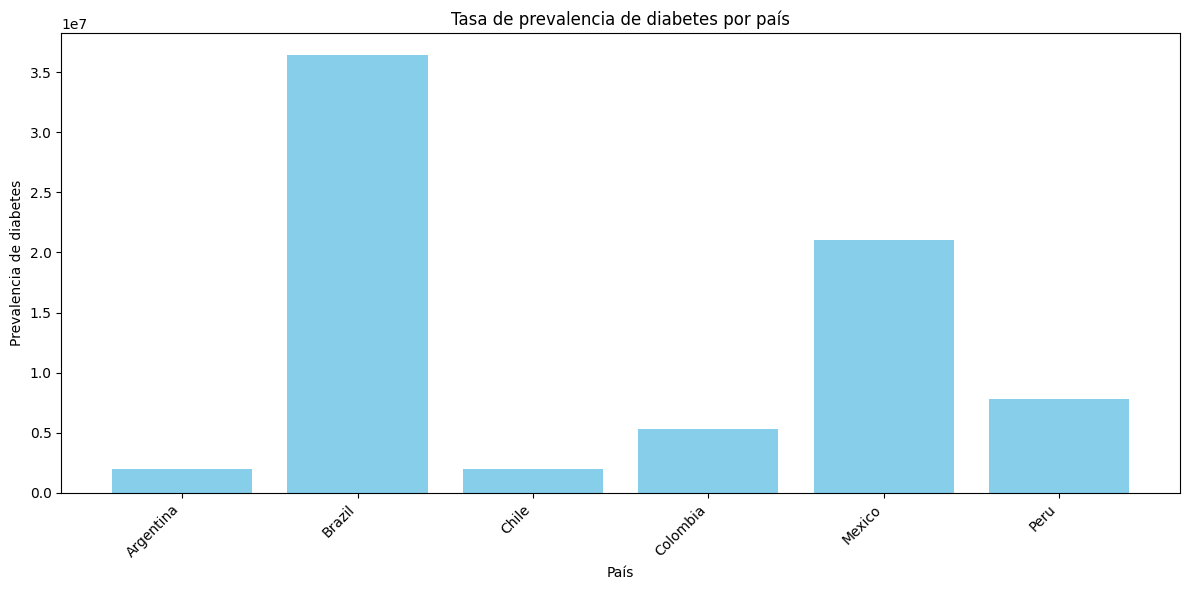

In [ ]:


# Gráfico de barras de prevalencia de diabetes por país
import matplotlib.pyplot as plt

# Agrupar datos
df_sumdiabetes = df_bio.groupby("country_name")["diabetes_prevalence"].sum().reset_index()

# Crear figura y axes
fig, ax = plt.subplots(figsize=(12,6))

# Crear gráfico de barras
ax.bar(df_sumdiabetes['country_name'], df_sumdiabetes['diabetes_prevalence'], color='skyblue')

# Rotar nombres de países
ax.set_xticklabels(df_sumdiabetes['country_name'], rotation=45, ha='right')

# Etiquetas y título
ax.set_xlabel("País")
ax.set_ylabel("Prevalencia de diabetes")
ax.set_title("Tasa de prevalencia de diabetes por país")

# Mostrar gráfico
plt.tight_layout()  # Ajusta márgenes automáticamente
plt.show()



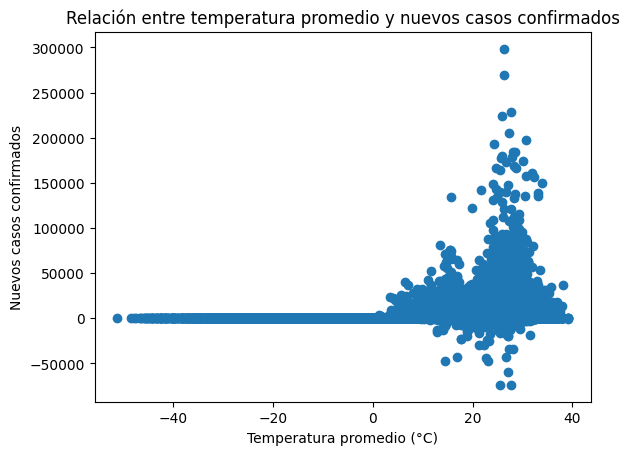

In [ ]:
# Gráfico de correlación entre temperatura y nuevos casos confirmados
fig,ax=plt.subplots()
ax.scatter(df_bio["average_temperature_celsius"],df_bio["new_confirmed"] )
ax.set_xlabel("Temperatura promedio (°C)")
ax.set_ylabel("Nuevos casos confirmados")

# Título
ax.set_title("Relación entre temperatura promedio y nuevos casos confirmados")

plt.show()

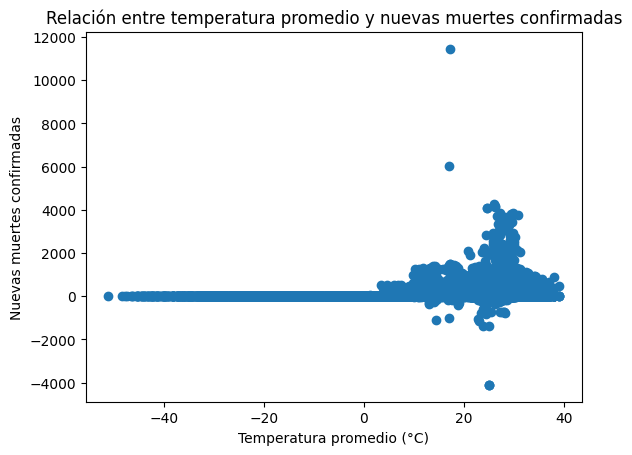

In [ ]:
# Gráfico de correlación entre temperatura y nuevas muertes confirmadas
fig,ax=plt.subplots()
ax.scatter(df_bio["average_temperature_celsius"],df_bio["new_deceased"] )
ax.set_xlabel("Temperatura promedio (°C)")
ax.set_ylabel("Nuevas muertes confirmadas")

# Título
ax.set_title("Relación entre temperatura promedio y nuevas muertes confirmadas")

plt.show()

In [ ]:
# Medida numérica de correlación de Spearman
df_corr = df_bio[["average_temperature_celsius", "new_deceased"]].dropna()

corr_spearman = df_corr.corr(method="spearman").iloc[0,1]
print("Correlación Spearman:", corr_spearman)


Correlación Spearman: -0.034272301062555764


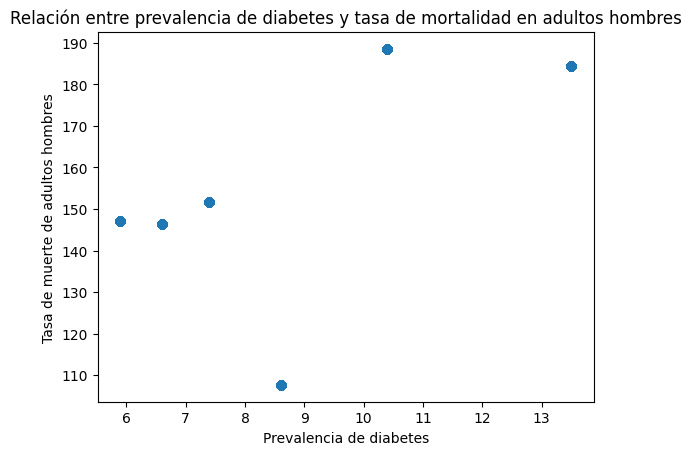

In [25]:
fig,ax=plt.subplots()
ax.scatter(df_bio["diabetes_prevalence"],df_bio["adult_male_mortality_rate"] )
ax.set_xlabel("Prevalencia de diabetes")
ax.set_ylabel("Tasa de muerte de adultos hombres")

# Título
ax.set_title("Relación entre prevalencia de diabetes y tasa de mortalidad en adultos hombres")

plt.show()

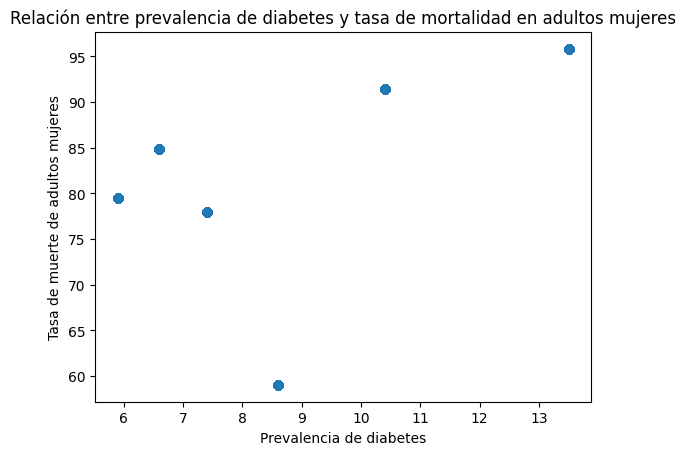

In [26]:
fig,ax=plt.subplots()
ax.scatter(df_bio["diabetes_prevalence"],df_bio["adult_female_mortality_rate"] )
ax.set_xlabel("Prevalencia de diabetes")
ax.set_ylabel("Tasa de muerte de adultos mujeres")

# Título
ax.set_title("Relación entre prevalencia de diabetes y tasa de mortalidad en adultos mujeres")

plt.show()

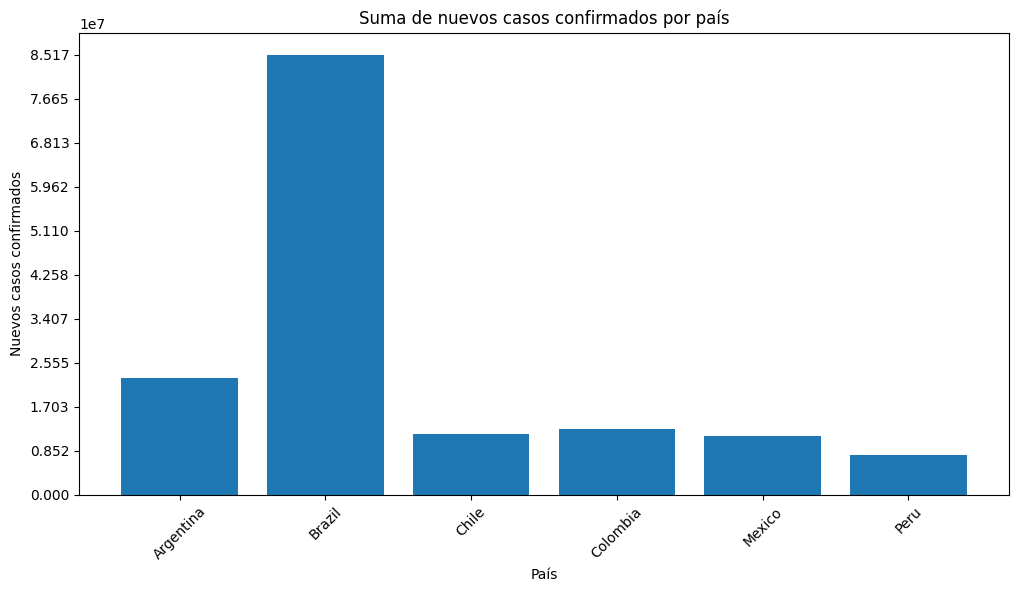

In [ ]:
# Nuevos casos confirmados (suma de todo el período) por País
nuevas_muertes = df_bio.groupby("country_name")["new_confirmed"].sum()

fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
ax.bar(nuevas_muertes.index, nuevas_muertes.values)

# Título y nombres de ejes
ax.set_title("Suma de nuevos casos confirmados por país")
ax.set_xlabel("País")
ax.set_ylabel("Nuevos casos confirmados")

# Mostrar valores en el eje y
ax.set_yticks(range(0, int(nuevas_muertes.max()) + 1, int(nuevas_muertes.max()/10)))  # pasos de 10% del máximo

# Rotar etiquetas del eje x para legibilidad
plt.xticks(rotation=45)

plt.show()


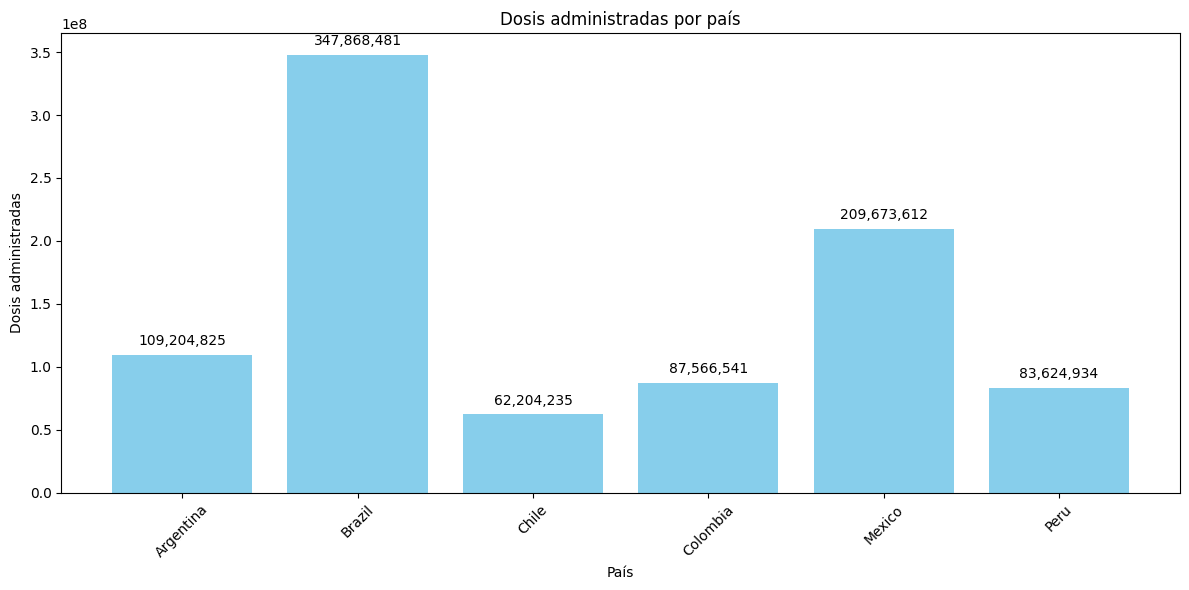

In [28]:

nuevas_dosis = df_bio.groupby("country_name")["cumulative_vaccine_doses_administered"].max()

fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
bars = ax.bar(nuevas_dosis.index, nuevas_dosis.values, color='skyblue')

# Título y nombres de ejes
ax.set_title("Dosis administradas por país")
ax.set_xlabel("País")
ax.set_ylabel("Dosis administradas")

# Rotar etiquetas del eje x
plt.xticks(rotation=45)

# Agregar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',  # Formato con separador de miles
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()




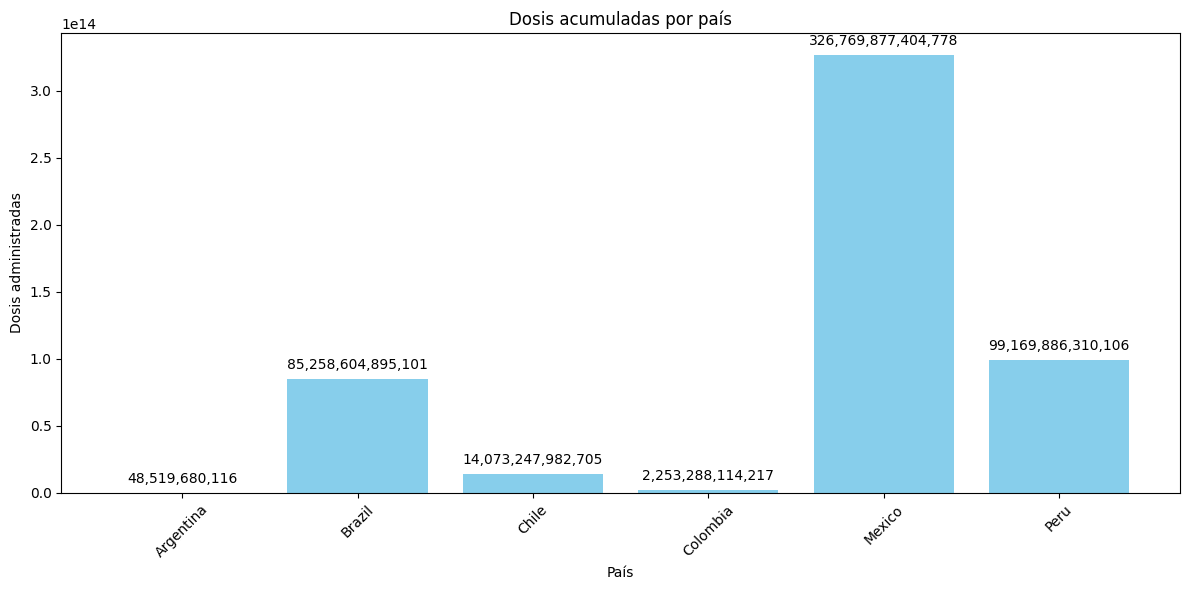

In [29]:

nuevas_dosis = df_bio.groupby("country_name")["cumulative_vaccine_doses_administered"].sum()

fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
bars = ax.bar(nuevas_dosis.index, nuevas_dosis.values, color='skyblue')

# Título y nombres de ejes
ax.set_title("Dosis acumuladas por país")
ax.set_xlabel("País")
ax.set_ylabel("Dosis administradas")

# Rotar etiquetas del eje x
plt.xticks(rotation=45)

# Agregar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',  # Formato con separador de miles
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

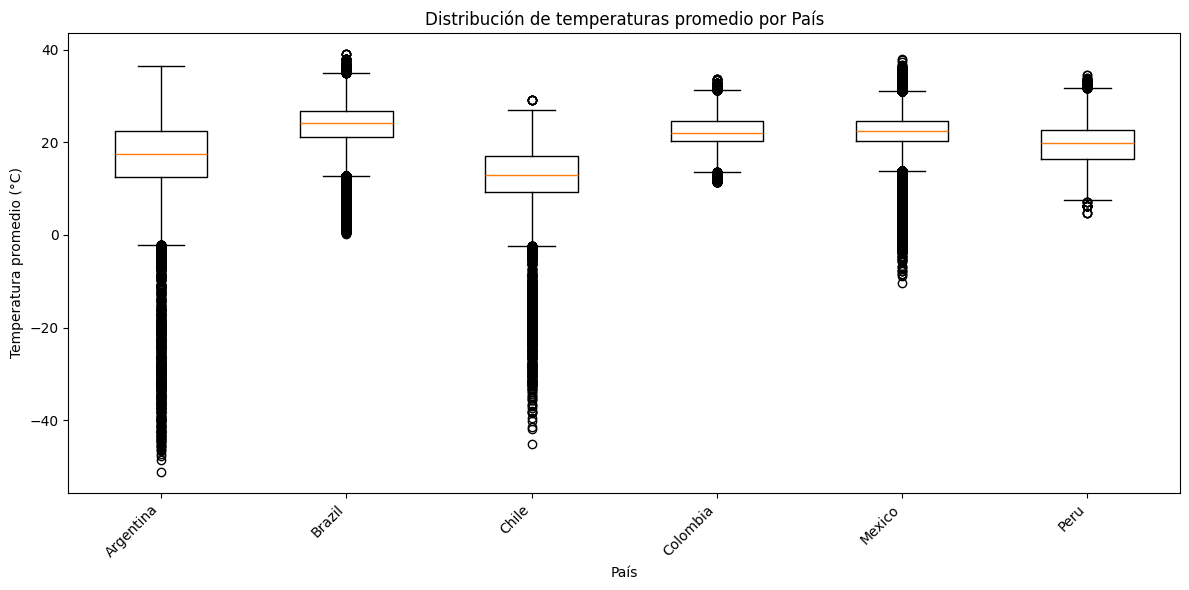

In [ ]:
#Box plot de temperaturas por País
import matplotlib.pyplot as plt

# Obtener los datos agrupados por país
paises = df_bio['country_name'].unique()
data = [df_bio[df_bio['country_name'] == p]['average_temperature_celsius'] for p in paises]

# Crear figura y axes
fig, ax = plt.subplots(figsize=(12,6))

# Dibujar boxplot
ax.boxplot(data)

# Configurar eje X con nombres de países
ax.set_xticks(range(1, len(paises)+1))
ax.set_xticklabels(paises, rotation=45, ha='right')

# Título y etiquetas
ax.set_title("Distribución de temperaturas promedio por País")
ax.set_xlabel("País")
ax.set_ylabel("Temperatura promedio (°C)")

plt.tight_layout()
plt.show()



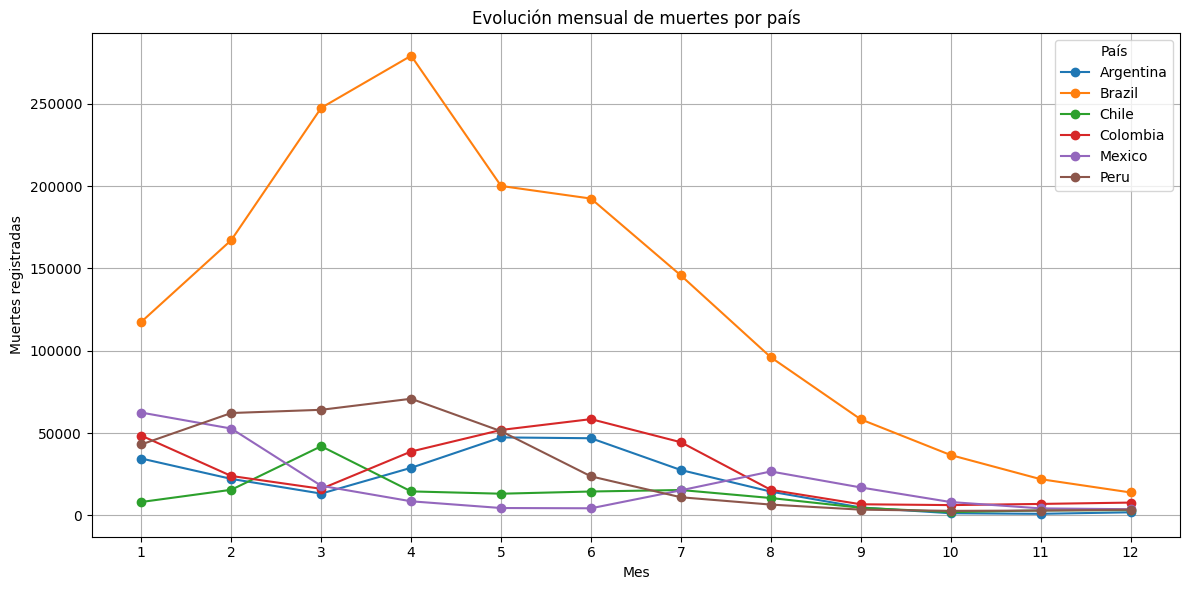

In [ ]:
# Gráfico de líneas de la evolución mensual de muertes por país
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'mes' exista
df_bio["mes"] = df_bio["date"].dt.month

# Agrupar muertes por mes y país
muertes_por_mes = (
    df_bio.groupby(["mes", "country_name"])["new_deceased"]
          .sum()
          .reset_index()
)

# Crear figura y axes
fig, ax = plt.subplots(figsize=(12,6))

# Lista de países únicos
paises = muertes_por_mes['country_name'].unique()

# Graficar cada país
for pais in paises:
    df_pais = muertes_por_mes[muertes_por_mes['country_name'] == pais]
    ax.plot(
        df_pais['mes'], 
        df_pais['new_deceased'], 
        marker='o', 
        label=pais
    )

# Configuración de títulos y etiquetas
ax.set_title("Evolución mensual de muertes por país")
ax.set_xlabel("Mes")
ax.set_ylabel("Muertes registradas")

# Leyenda
ax.legend(title="País")

# Rejilla y ticks
ax.grid(True)
plt.xticks(range(1,13))  # Todos los meses
plt.tight_layout()
plt.show()

	

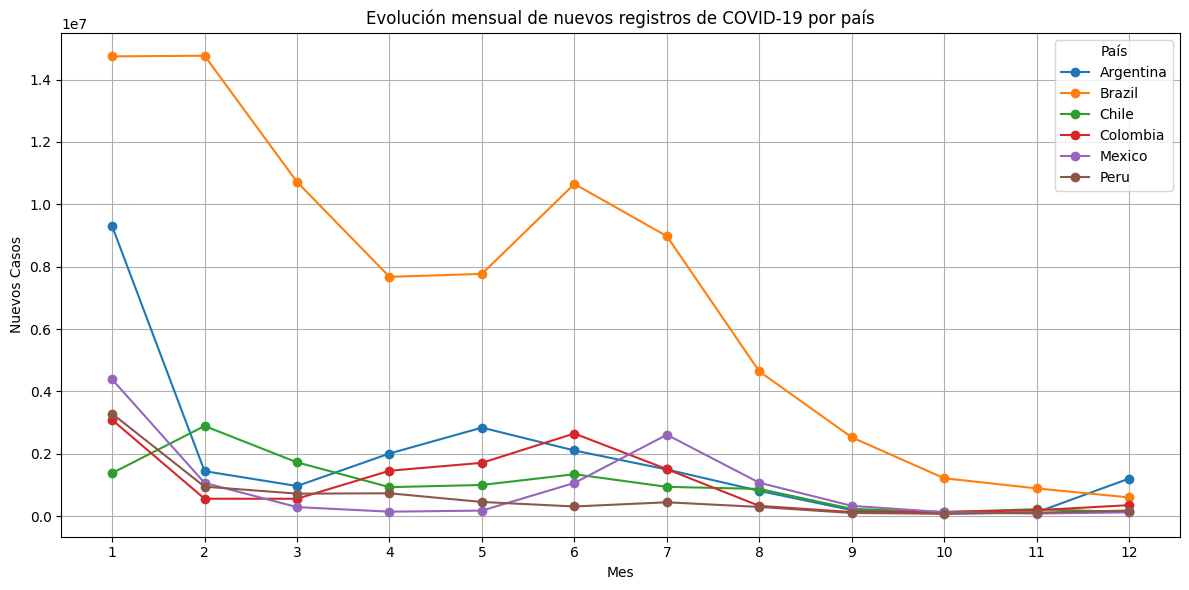

In [ ]:
# Gráfico de líneas de la evolución mensual de casos nuevos por país
import matplotlib.pyplot as plt

# Agrupar nuevos casos por mes y país
nuevos_confirmados_por_mes = (
    df_bio.groupby(["mes", "country_name"])["new_confirmed"]
          .sum()
          .reset_index()
)

# Crear figura y axes
fig, ax = plt.subplots(figsize=(12,6))

# Lista de países únicos
paises = nuevos_confirmados_por_mes['country_name'].unique()

# Graficar cada país
for pais in paises:
    df_pais = nuevos_confirmados_por_mes[nuevos_confirmados_por_mes['country_name'] == pais]
    ax.plot(
        df_pais['mes'], 
        df_pais['new_confirmed'], 
        marker='o', 
        label=pais
    )

# Configuración de título y etiquetas
ax.set_title("Evolución mensual de nuevos registros de COVID-19 por país")
ax.set_xlabel("Mes")
ax.set_ylabel("Nuevos Casos")

# Leyenda
ax.legend(title="País")

# Rejilla y ticks
ax.grid(True)
plt.xticks(range(1,13))  # Mostrar todos los meses
plt.tight_layout()
plt.show()

	

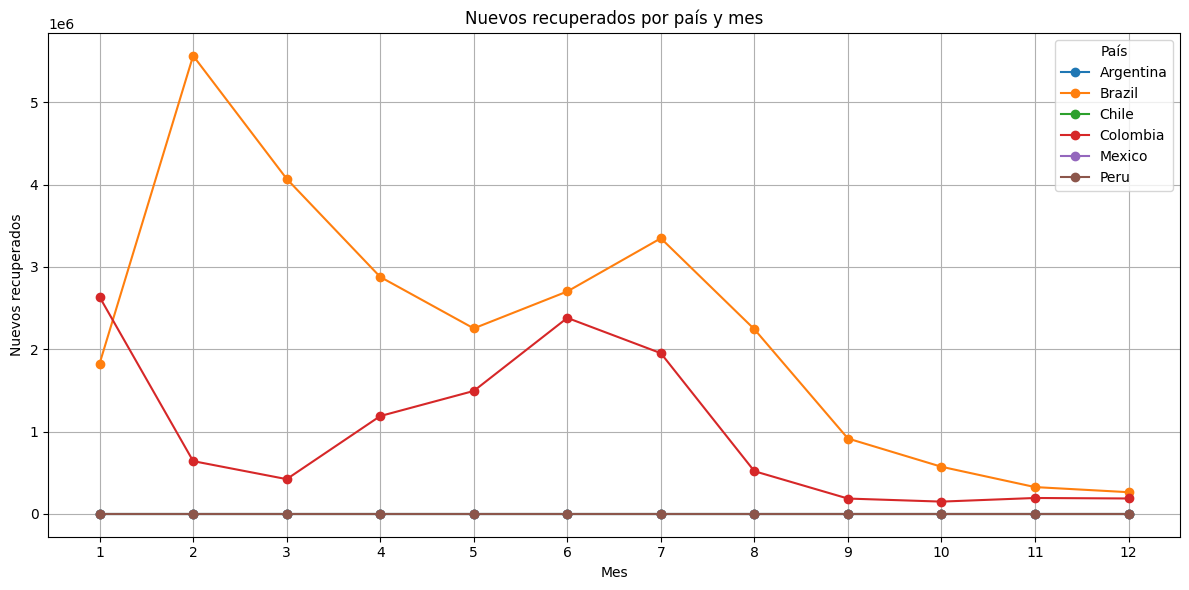

In [34]:
import matplotlib.pyplot as plt

# Agrupar nuevos recuperados por mes y país
nuevos_recuperados_por_mes = (
    df_bio.groupby(["mes", "country_name"])["new_recovered"]
          .sum()
          .reset_index()
)

# Crear figura y axes
fig, ax = plt.subplots(figsize=(12,6))

# Lista de países únicos
paises = nuevos_recuperados_por_mes['country_name'].unique()

# Graficar cada país
for pais in paises:
    df_pais = nuevos_recuperados_por_mes[nuevos_recuperados_por_mes['country_name'] == pais]
    ax.plot(
        df_pais['mes'], 
        df_pais['new_recovered'], 
        marker='o', 
        label=pais
    )

# Configuración de título y etiquetas
ax.set_title("Nuevos recuperados por país y mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Nuevos recuperados")

# Leyenda
ax.legend(title="País")

# Rejilla y ticks
ax.grid(True)
plt.xticks(range(1,13))  # Mostrar todos los meses
plt.tight_layout()
plt.show()


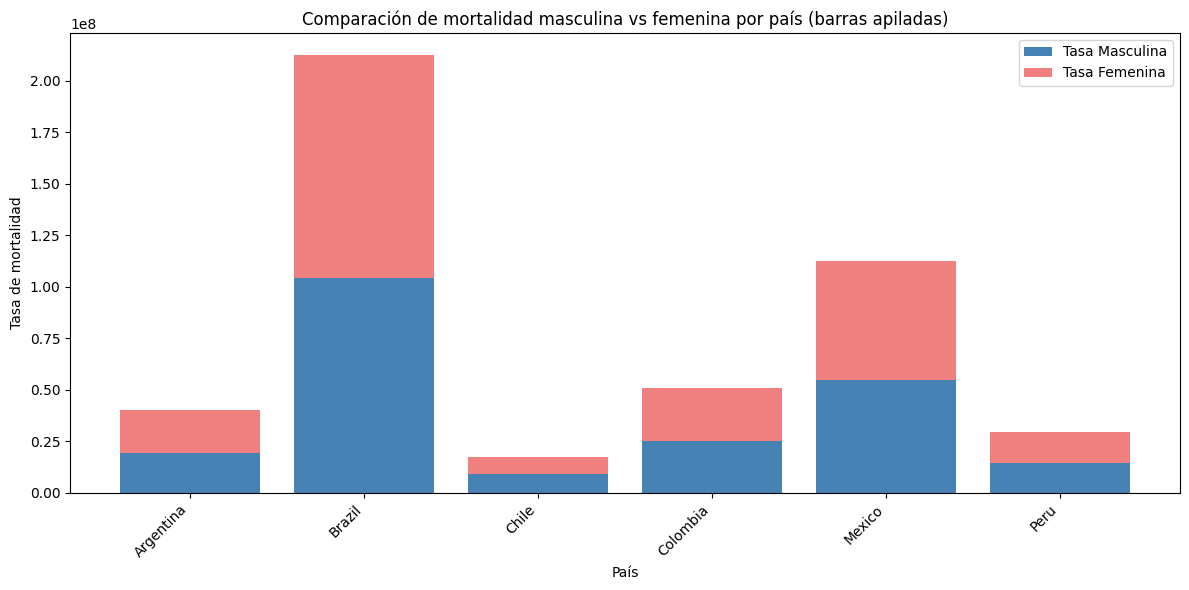

In [35]:
hombres_tasa= df_bio.groupby("country_name")["population_male"].max()
mujeres_tasa= df_bio.groupby("country_name")["population_female"].max()


countries = hombres_tasa.index

plt.figure(figsize=(12, 6))
ax = plt.gca()

# Barras apiladas
ax.bar(countries, hombres_tasa, label='Tasa Masculina', color='steelblue')
ax.bar(countries, mujeres_tasa, bottom=hombres_tasa, label='Tasa Femenina', color='lightcoral')

# Etiquetas y título
ax.set_xlabel("País")
ax.set_ylabel("Tasa de mortalidad")
ax.set_title("Comparación de mortalidad masculina vs femenina por país (barras apiladas)")
ax.legend()


plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



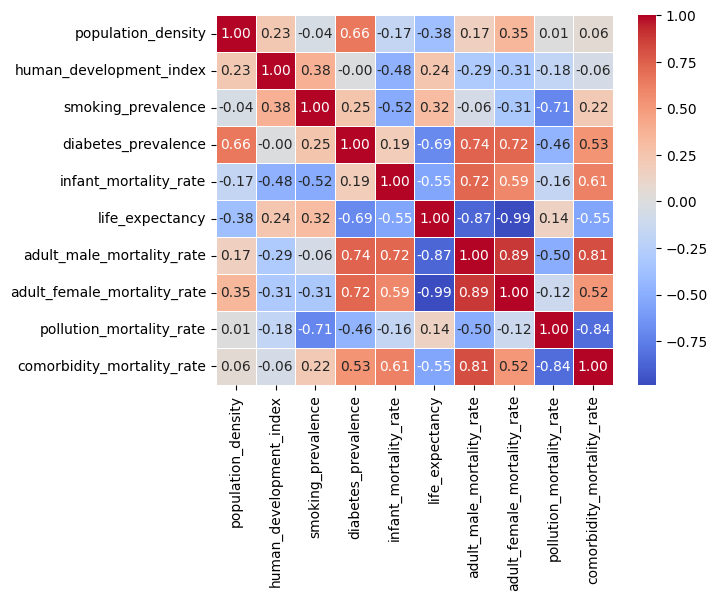

In [ ]:
# Heatmap de correlación entre múltiples variables
variables_interes = [

    "population_density",
    "human_development_index",
    "smoking_prevalence",
    "diabetes_prevalence",
    "infant_mortality_rate",
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate",
    "pollution_mortality_rate",
    "comorbidity_mortality_rate",
   
]

df_seleccionado_matriz = df_bio[variables_interes]
corr= df_seleccionado_matriz.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm", linewidths=.5,fmt=".2f")
plt.title="Matriz de correlación entre variables demográficas y de salud"
plt.show()


In [ ]:
#Avance 3
# En adelante dejo el código de cada uno de los gráficos que realicé. Muchos de ellos explorar diferentes cuestiones del dataset y algunos reponden más a curiosidades que a información que luego se volcó en el informe.
# Estos son los códigos que luego se llevaron a Power Bi en los casos que se replicaron estos gráficos en el Dashboard.

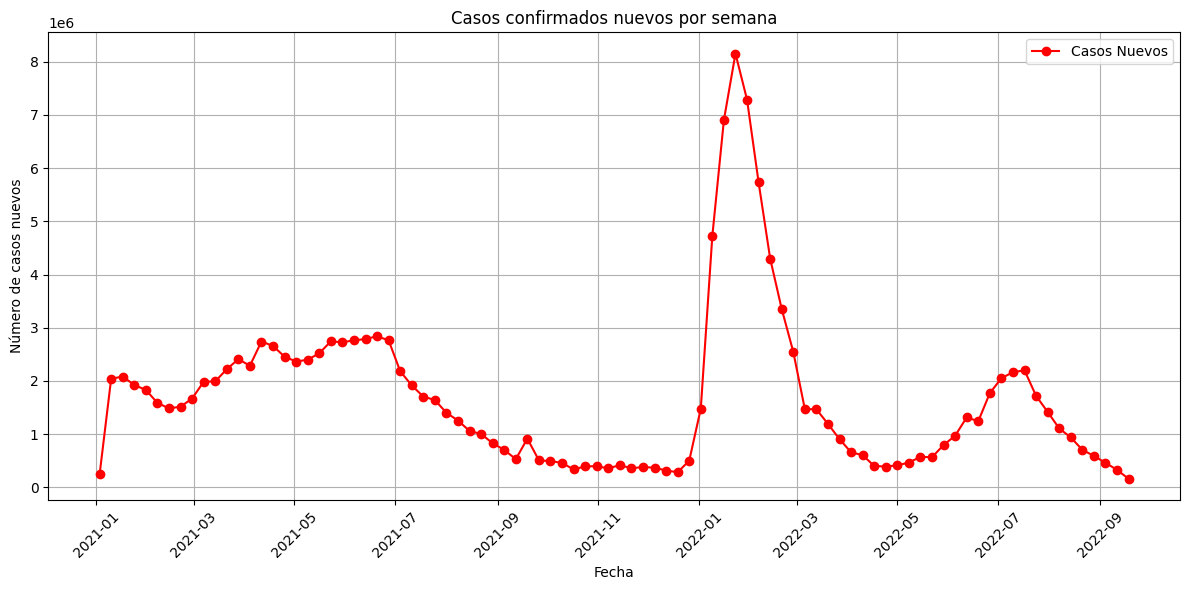

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df_bio['date'] = pd.to_datetime(df_bio['date'])
df_bio = df_bio.set_index('date')


# Resample semanal
semanal_nuevos = df_bio['new_confirmed'].resample('W').sum()

# Gráfico
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(semanal_nuevos.index, semanal_nuevos.values, marker='o', color='red', label='Casos Nuevos')

ax.set_title("Casos confirmados nuevos por semana")
ax.set_xlabel("Fecha")
ax.set_ylabel("Número de casos nuevos")
ax.grid(True)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



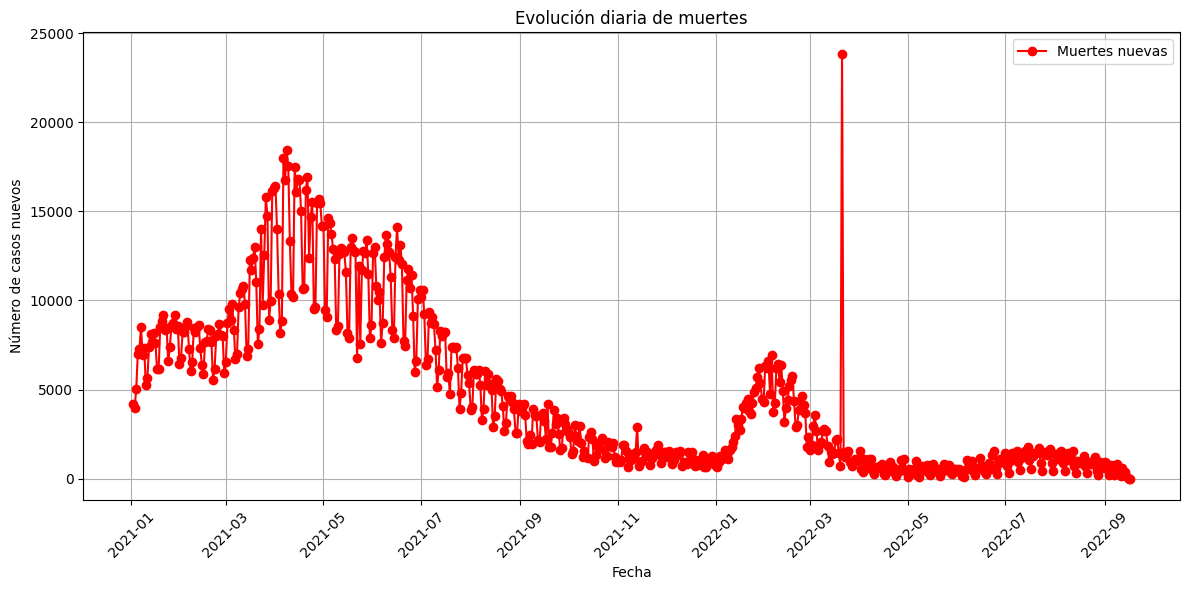

In [40]:
import pandas as pd
import matplotlib.pyplot as plt




# Resample semanal
muertes_diarias = df_bio['new_deceased'].resample('D').sum()

# Gráfico
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(muertes_diarias.index, muertes_diarias.values, marker='o', color='red', label='Muertes nuevas')

ax.set_title("Evolución diaria de muertes")
ax.set_xlabel("Fecha")
ax.set_ylabel("Número de casos nuevos")
ax.grid(True)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
dia_max_muertes = df_bio['new_deceased'].idxmax()
max_muertes = df_bio['new_deceased'].max()

print("El día con mayor número de muertes:", dia_max_muertes.date())
print("Número de muertes ese día:", max_muertes)



El día con mayor número de muertes: 2022-03-21
Número de muertes ese día: 11447.0


In [42]:
import pandas as pd

pd.options.display.float_format = '{:,.0f}'.format

poblacion_total= df_bio.groupby("country_name")['population'].max()
print(poblacion_total)

country_name
Argentina    44,938,712
Brazil      212,559,409
Chile        17,574,003
Colombia     50,882,884
Mexico      110,991,953
Peru         29,381,884
Name: population, dtype: float64


In [43]:
confirmados_nuevos_totales= df_bio.groupby("country_name")['new_confirmed'].sum()
print(poblacion_total)

country_name
Argentina    44,938,712
Brazil      212,559,409
Chile        17,574,003
Colombia     50,882,884
Mexico      110,991,953
Peru         29,381,884
Name: population, dtype: float64


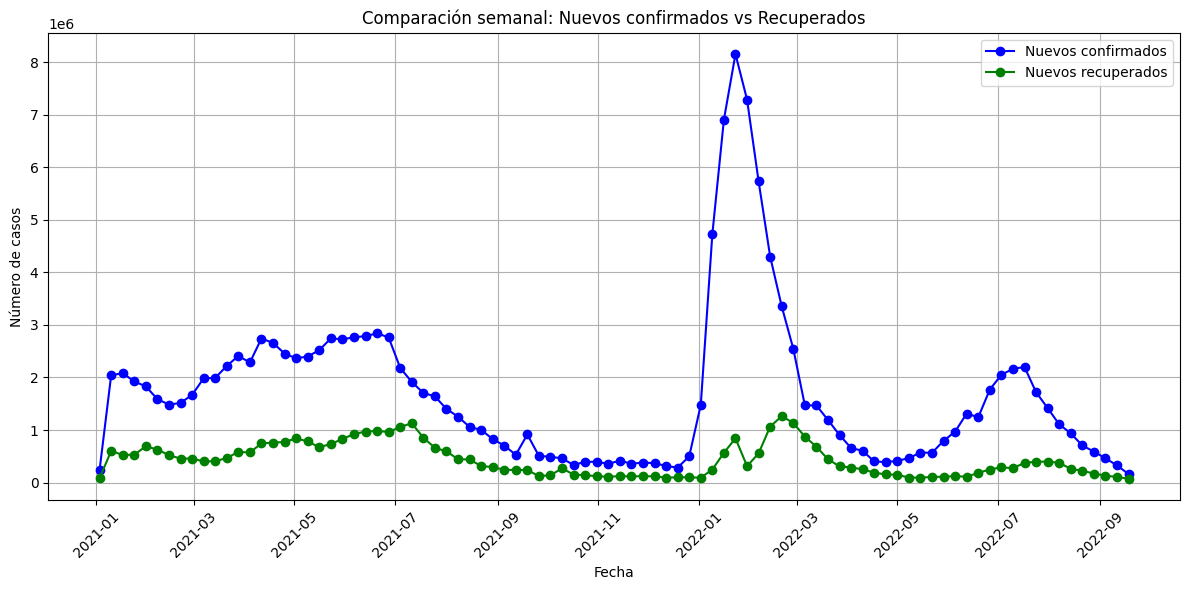

In [44]:

nuevos_activos = df_bio['new_confirmed'].resample('W').sum()
nuevos_recuperados= df_bio['new_recovered'].resample('W').sum()



fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    nuevos_activos.index,
    nuevos_activos.values,
    marker='o',
    label='Nuevos confirmados',
    color='blue'
)

ax.plot(
    nuevos_recuperados.index,
    nuevos_recuperados.values,
    marker='o',
    label='Nuevos recuperados',
    color='green'
)

ax.set_title("Comparación semanal: Nuevos confirmados vs Recuperados")
ax.set_xlabel("Fecha")
ax.set_ylabel("Número de casos")
ax.grid(True)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:

# Casos semanales
casos_semanales = df_bio['new_confirmed'].resample('W').sum()

# Tasa de crecimiento semanal
tasa_crecimiento = (casos_semanales - casos_semanales.shift(1)) / casos_semanales.shift(1)
tasa_crecimiento = tasa_crecimiento * 100



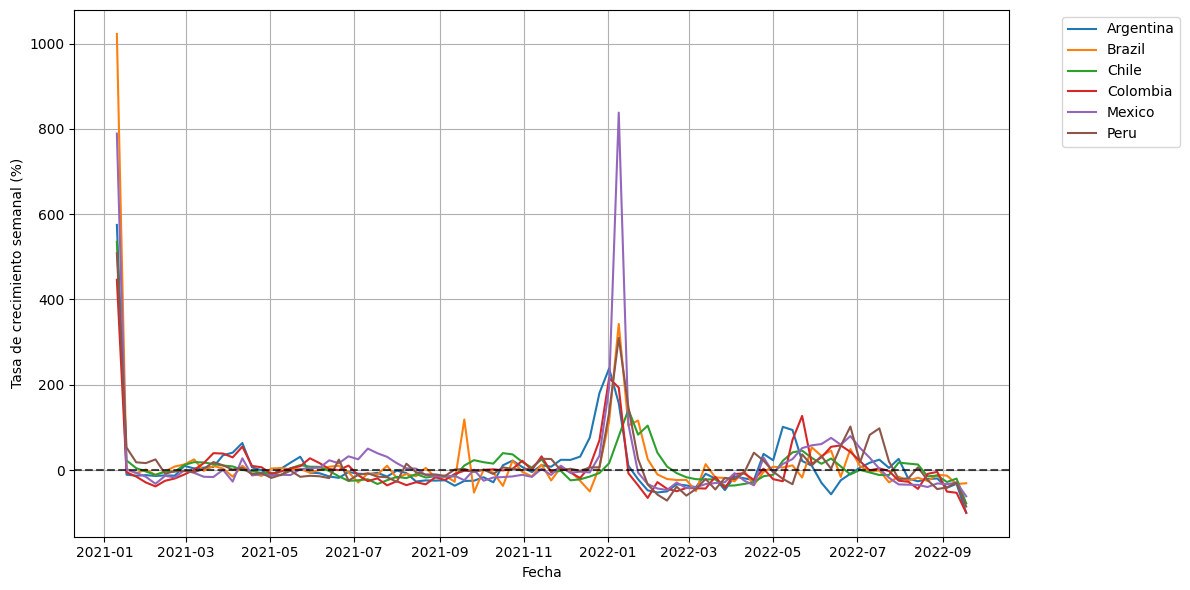

In [46]:




import pandas as pd
import matplotlib.pyplot as plt

# Asegurar índice datetime
df_bio.index = pd.to_datetime(df_bio.index)

# Casos semanales por país
casos_semanales = (
    df_bio
    .groupby('country_name')
    .resample('W')['new_confirmed']
    .sum()
)

# Tasa de crecimiento semanal (%)
tasa_crecimiento = (
    casos_semanales
    .groupby(level=0)
    .pct_change() * 100
)

# Convertir a DataFrame
tasa_crecimiento = tasa_crecimiento.reset_index(name='tasa_crecimiento')


# ===== GRAFICO =====
plt.figure(figsize=(12, 6))

for pais in tasa_crecimiento['country_name'].unique():
    datos_pais = tasa_crecimiento[tasa_crecimiento['country_name'] == pais]
    plt.plot(datos_pais['date'], datos_pais['tasa_crecimiento'], label=pais)

plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento semanal (%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




In [47]:
poblacion_total= df_bio.groupby("country_name")['population'].max()
dosis__total= df_bio.groupby("country_name")['cumulative_vaccine_doses_administered'].max()
print(poblacion_total)
print(dosis__total)
porcentaje_cubierto= (dosis__total*100)/poblacion_total

country_name
Argentina    44,938,712
Brazil      212,559,409
Chile        17,574,003
Colombia     50,882,884
Mexico      110,991,953
Peru         29,381,884
Name: population, dtype: float64
country_name
Argentina   109,204,825
Brazil      347,868,481
Chile        62,204,235
Colombia     87,566,541
Mexico      209,673,612
Peru         83,624,934
Name: cumulative_vaccine_doses_administered, dtype: float64


In [48]:
# Población total por país
poblacion_total = df_bio.groupby('country_name')['population'].max()

# Total acumulado de dosis administradas
dosis_total = df_bio.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

# Porcentaje de dosis respecto a la población (puede ser > 100%)
porcentaje_cubierto = (dosis_total * 100) / poblacion_total

print(porcentaje_cubierto)


country_name
Argentina   243
Brazil      164
Chile       354
Colombia    172
Mexico      189
Peru        285
dtype: float64


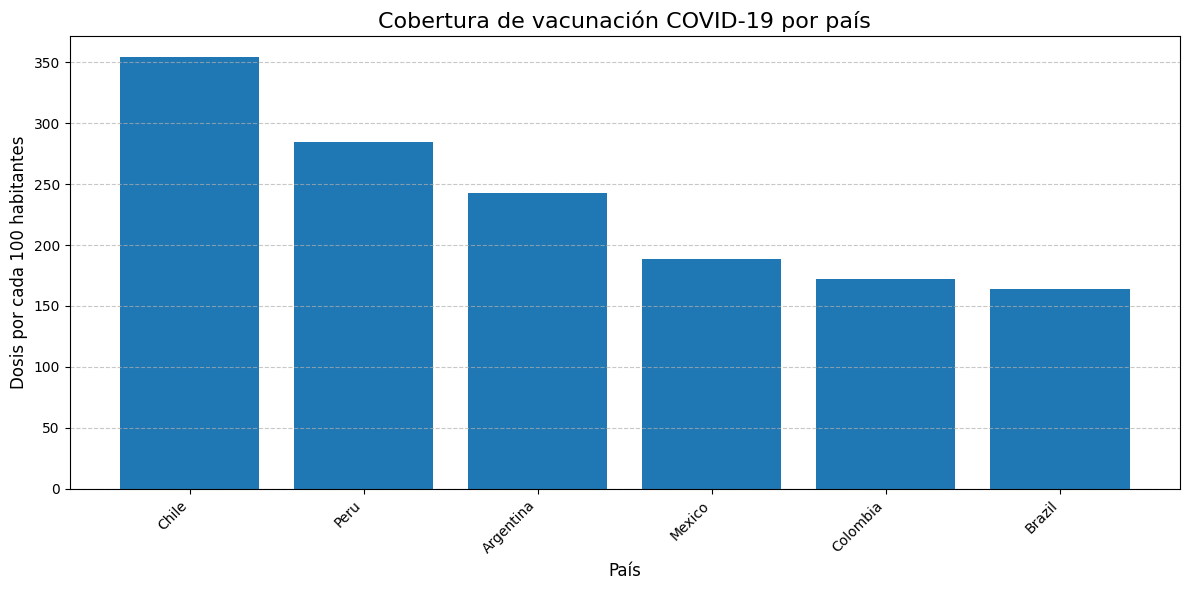

In [49]:


cobertura = porcentaje_cubierto.reset_index(name='dosis_por_100_habitantes')
cobertura = cobertura.sort_values(by='dosis_por_100_habitantes', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    cobertura['country_name'],
    cobertura['dosis_por_100_habitantes']
)

# Títulos y etiquetas usando ax
ax.set_title('Cobertura de vacunación COVID-19 por país', fontsize=16)
ax.set_xlabel('País', fontsize=12)
ax.set_ylabel('Dosis por cada 100 habitantes', fontsize=12)

# Ajustes estéticos
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\3391561945.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['cumulative_vaccine_doses_administered']


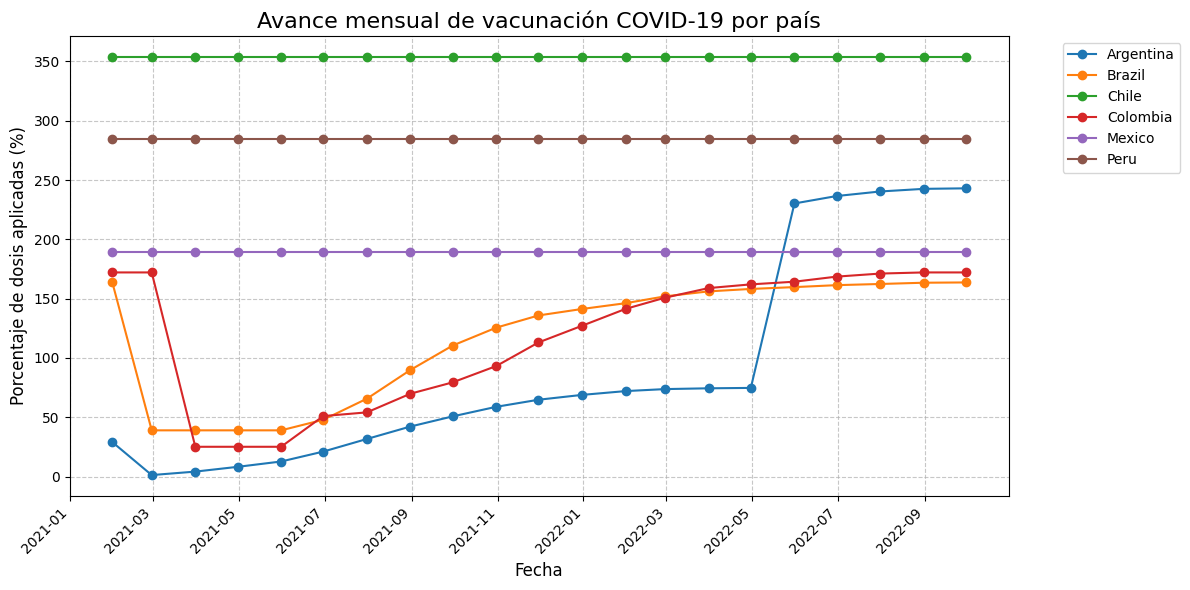

In [50]:
import pandas as pd
import matplotlib.pyplot as plt



# ===== 1. Población total por país =====
poblacion_total = df_bio.groupby('country_name')['population'].max()

# ===== 2. Vacunas acumuladas por mes y país =====
vacunas_mensuales = (
    df_bio
    .groupby('country_name')
    .resample('M')['cumulative_vaccine_doses_administered']
    .max()
)

# ===== 3. Porcentaje de dosis respecto a la población (puede ser >100%) =====
avance_vacunas = vacunas_mensuales / vacunas_mensuales.index.get_level_values(0).map(poblacion_total) * 100

# Convertir a DataFrame para graficar
avance_vacunas_df = avance_vacunas.reset_index(name='porcentaje_avance')

# ===== 4. Gráfico de líneas mensual por país usando Axes =====
fig, ax = plt.subplots(figsize=(12, 6))

for pais in avance_vacunas_df['country_name'].unique():
    datos_pais = avance_vacunas_df[avance_vacunas_df['country_name'] == pais]
    ax.plot(
        datos_pais['date'],
        datos_pais['porcentaje_avance'],
        marker='o',  # opcional, para marcar puntos
        label=pais
    )

# Títulos y etiquetas usando Axes
ax.set_title('Avance mensual de vacunación COVID-19 por país', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Porcentaje de dosis aplicadas (%)', fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()



In [51]:
dosis_max_mensual = (
    df_bio
    .groupby('country_name')
    .resample('M')['cumulative_vaccine_doses_administered']
    .max()
)

ultimos_5_por_pais = dosis_max_mensual.groupby('country_name').tail(5)

# Mostrar resultados
print(ultimos_5_por_pais)

C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\1276131802.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['cumulative_vaccine_doses_administered']


country_name  date      
Argentina     2022-05-31   103,470,232
              2022-06-30   106,285,946
              2022-07-31   108,012,684
              2022-08-31   109,007,243
              2022-09-30   109,204,825
Brazil        2022-05-31   339,502,510
              2022-06-30   342,990,419
              2022-07-31   345,102,543
              2022-08-31   347,356,987
              2022-09-30   347,868,481
Chile         2022-05-31    62,204,235
              2022-06-30    62,204,235
              2022-07-31    62,204,235
              2022-08-31    62,204,235
              2022-09-30    62,204,235
Colombia      2022-05-31    83,585,958
              2022-06-30    85,767,160
              2022-07-31    87,079,477
              2022-08-31    87,566,541
              2022-09-30    87,566,541
Mexico        2022-05-31   209,673,612
              2022-06-30   209,673,612
              2022-07-31   209,673,612
              2022-08-31   209,673,612
              2022-09-30   209,673,612


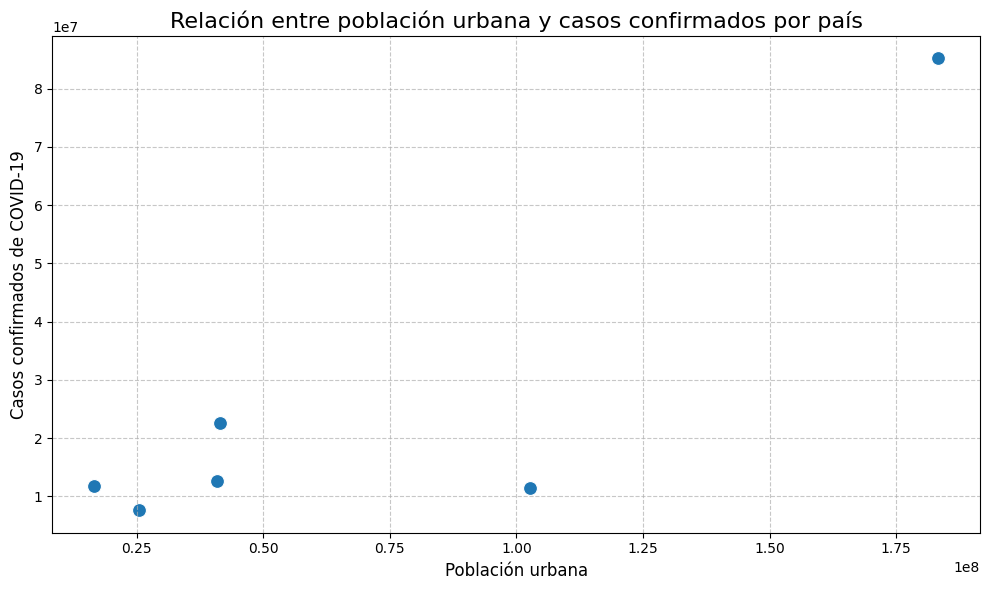

Coeficiente de correlación: 0.87


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que el índice sea datetime
df_bio.index = pd.to_datetime(df_bio.index)

# ===== 1. Agrupar por país =====
# Total de casos confirmados por país
casos_confirmados = df_bio.groupby('country_name')['new_confirmed'].sum()

# Población urbana por país
poblacion_urbana = df_bio.groupby('country_name')['population_urban'].max()

# Combinar en un DataFrame
df_relacion = pd.DataFrame({
    'casos_confirmados': casos_confirmados,
    'poblacion_urbana': poblacion_urbana
}).dropna()

# ===== 2. Gráfico de dispersión con Axes =====
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    data=df_relacion,
    x='poblacion_urbana',
    y='casos_confirmados',
    s=100,
    ax=ax
)

# Títulos y etiquetas usando Axes
ax.set_title('Relación entre población urbana y casos confirmados por país', fontsize=16)
ax.set_xlabel('Población urbana', fontsize=12)
ax.set_ylabel('Casos confirmados de COVID-19', fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ===== 3. Correlación (opcional) =====
correlacion = df_relacion.casos_confirmados.corr(df_relacion.poblacion_urbana)
print(f"Coeficiente de correlación: {correlacion:.2f}")


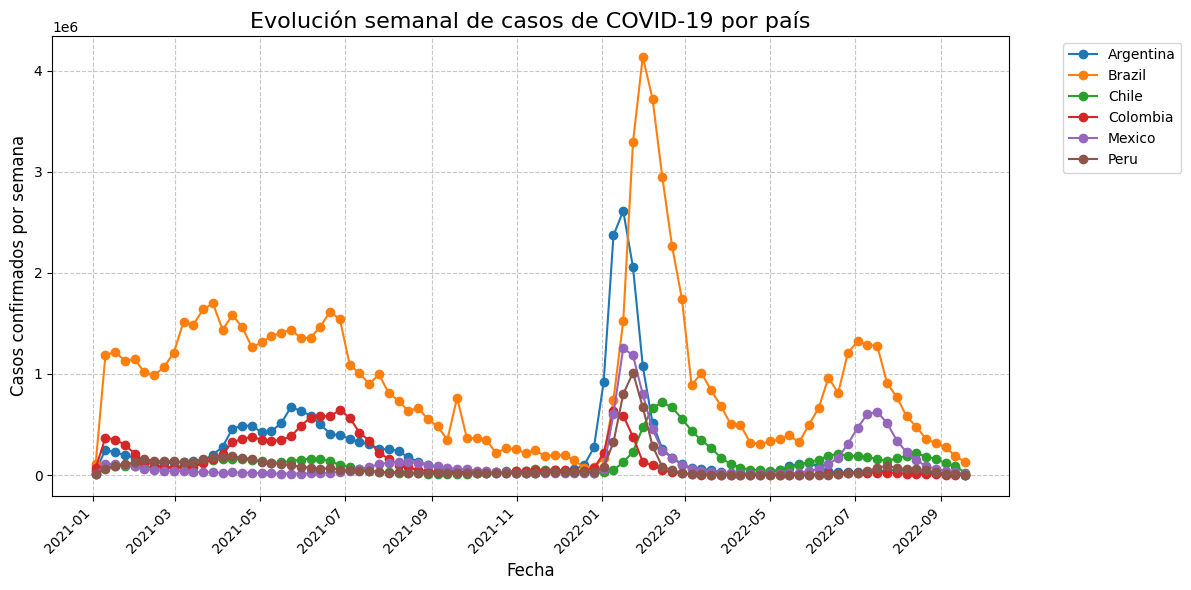

In [53]:
casos_nuevos = df_bio.groupby('country_name')['new_confirmed'].resample('W').sum()

# Convertir a DataFrame para facilitar la manipulación
casos_nuevos_df = casos_nuevos.reset_index()

# ===== Gráfico de líneas =====
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada país
for pais in casos_nuevos_df['country_name'].unique():
    datos_pais = casos_nuevos_df[casos_nuevos_df['country_name'] == pais]
    ax.plot(
        datos_pais['date'], 
        datos_pais['new_confirmed'], 
        marker='o',  # opcional, para marcar puntos
        label=pais
    )

# Títulos y etiquetas usando Axes
ax.set_title('Evolución semanal de casos de COVID-19 por país', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Casos confirmados por semana', fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()



C:\Users\lucas\AppData\Local\Temp\ipykernel_9472\901920207.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  casos_anuales = df_bio.groupby('country_name')['new_confirmed'].resample('Y').sum()


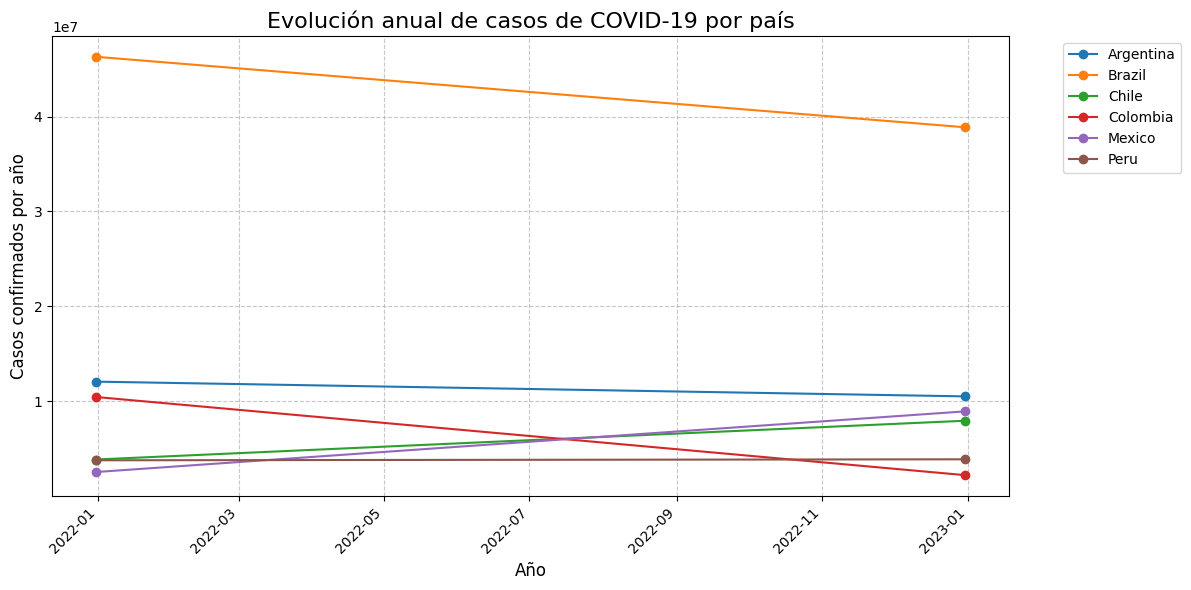

In [54]:
casos_anuales = df_bio.groupby('country_name')['new_confirmed'].resample('Y').sum()

# Convertir a DataFrame para graficar
casos_anuales_df = casos_anuales.reset_index()

# ===== Gráfico de líneas =====
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada país
for pais in casos_anuales_df['country_name'].unique():
    datos_pais = casos_anuales_df[casos_anuales_df['country_name'] == pais]
    ax.plot(
        datos_pais['date'], 
        datos_pais['new_confirmed'], 
        marker='o',  # opcional, para marcar puntos
        label=pais
    )

# Títulos y etiquetas usando Axes
ax.set_title('Evolución anual de casos de COVID-19 por país', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Casos confirmados por año', fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [55]:
poblacion_total_rango = df_bio.groupby('country_name')['population_age_70_79'].max()
print(poblacion_total_rango)



country_name
Argentina   1,817,557
Brazil      8,801,551
Chile         993,126
Colombia    1,979,761
Mexico      3,119,417
Peru        1,078,066
Name: population_age_70_79, dtype: float64


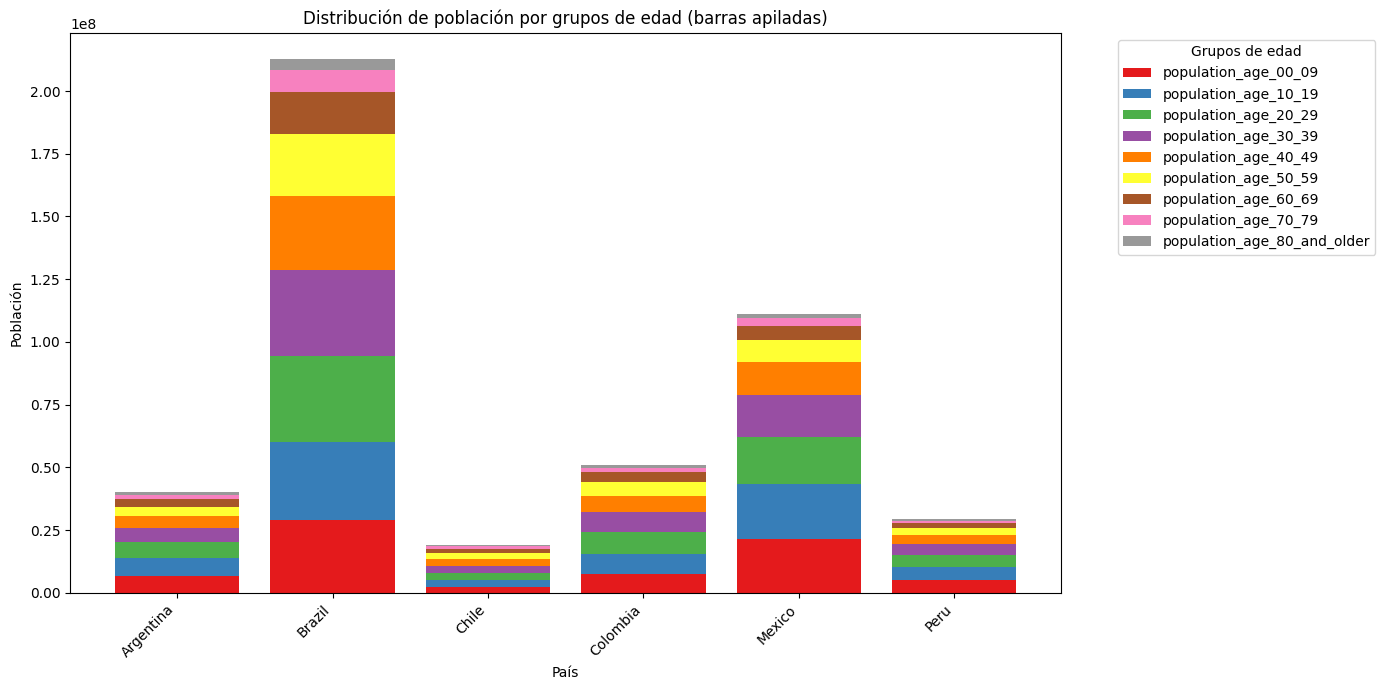

In [56]:
# Lista de columnas de edades
age_columns = [
    "population_age_00_09",
    "population_age_10_19",
    "population_age_20_29",
    "population_age_30_39",
    "population_age_40_49",
    "population_age_50_59",
    "population_age_60_69",
    "population_age_70_79",
    "population_age_80_and_older"
]

# Agrupar por país y calcular el promedio de cada edad (o suma si es preferible)
age_dist = df_bio.groupby("country_name")[age_columns].max()

# Países en el eje X
countries = age_dist.index

plt.figure(figsize=(14, 7))
ax = plt.gca()

# Colores opcionales para cada franja de edad
colors = [
    "#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00",
    "#ffff33", "#a65628", "#f781bf", "#999999"
]

# Graficar barras apiladas
bottom = None

for i, col in enumerate(age_columns):
    if bottom is None:
        ax.bar(countries, age_dist[col], label=col, color=colors[i])
        bottom = age_dist[col]
    else:
        ax.bar(countries, age_dist[col], bottom=bottom, label=col, color=colors[i])
        bottom = bottom + age_dist[col]

# Etiquetas y estilo
ax.set_xlabel("País")
ax.set_ylabel("Población")
ax.set_title("Distribución de población por grupos de edad (barras apiladas)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Grupos de edad", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


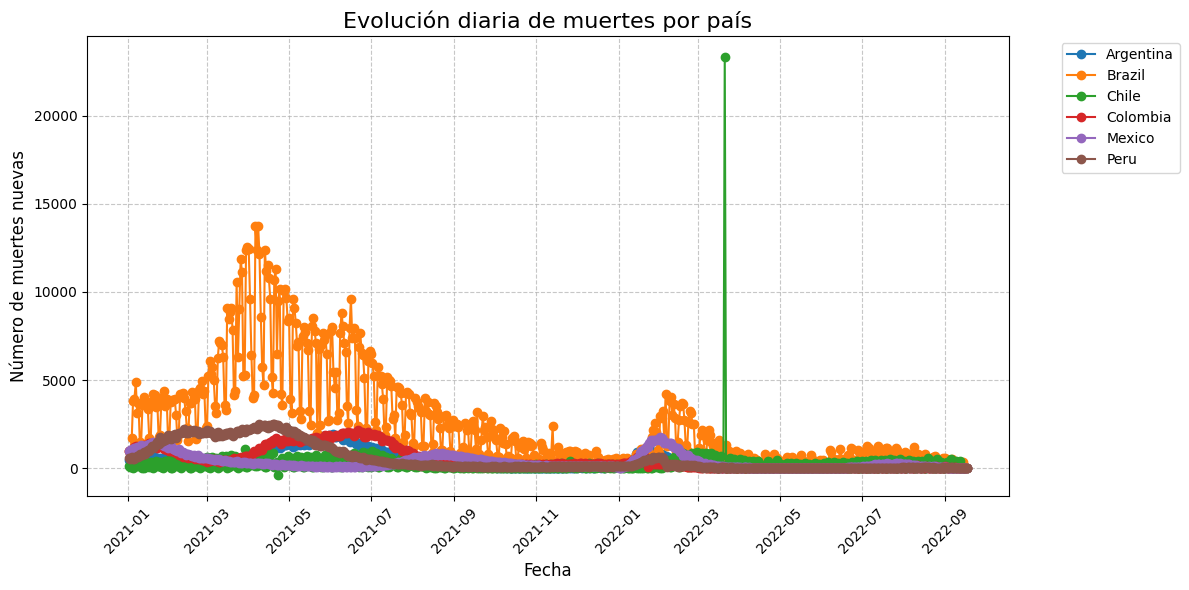

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse que el índice sea datetime
df_bio.index = pd.to_datetime(df_bio.index)

# ===== Muertes diarias por país =====
muertes_diarias_pais = df_bio.groupby('country_name')['new_deceased'].resample('D').sum()

# Convertir a DataFrame para graficar
muertes_df = muertes_diarias_pais.reset_index()

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(12,6))

# Graficar cada país
for pais in muertes_df['country_name'].unique():
    datos_pais = muertes_df[muertes_df['country_name'] == pais]
    ax.plot(
        datos_pais['date'],
        datos_pais['new_deceased'],
        marker='o',
        label=pais
    )

# Títulos y etiquetas usando Axes
ax.set_title("Evolución diaria de muertes por país", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Número de muertes nuevas", fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


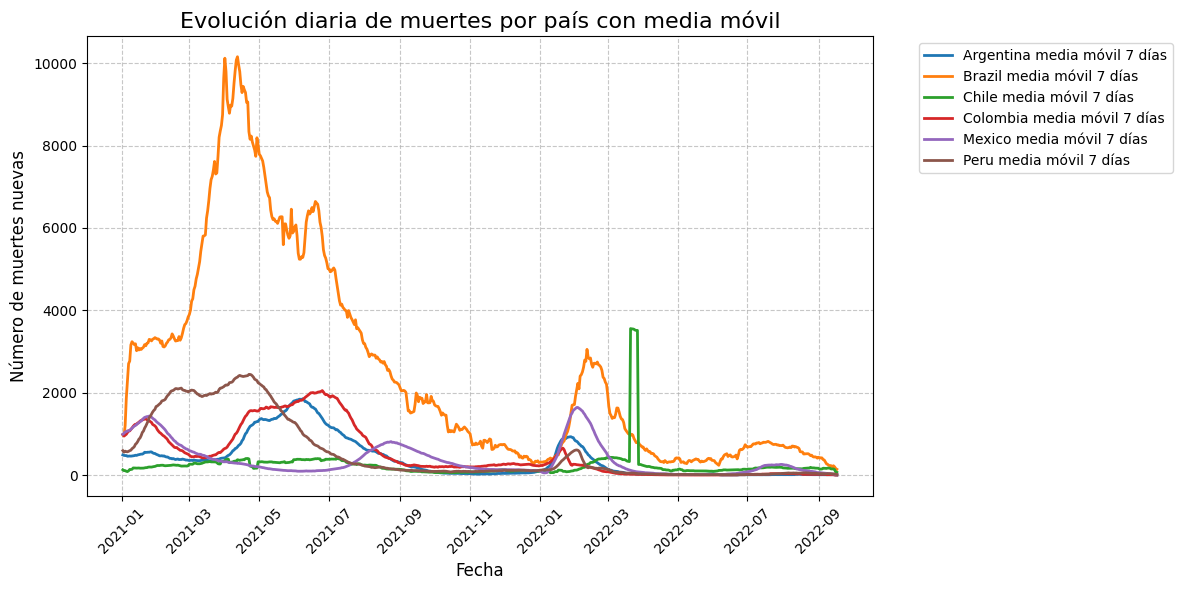

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse que el índice sea datetime
df_bio.index = pd.to_datetime(df_bio.index)

# ===== Muertes diarias por país =====
muertes_diarias_pais = df_bio.groupby('country_name')['new_deceased'].resample('D').sum()

# Convertir a DataFrame para graficar
muertes_df = muertes_diarias_pais.reset_index()

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(12,6))

# Ventana de la media móvil
ventana = 7  # 7 días

# Graficar cada país
for pais in muertes_df['country_name'].unique():
    datos_pais = muertes_df[muertes_df['country_name'] == pais].copy()
    
    # Calcular media móvil
    datos_pais['media_movil'] = datos_pais['new_deceased'].rolling(window=ventana, min_periods=1).mean()
    

    # Línea suavizada con media móvil
    ax.plot(
        datos_pais['date'],
        datos_pais['media_movil'],
        linewidth=2,
        label=f'{pais} media móvil {ventana} días'
    )

# Títulos y etiquetas usando Axes
ax.set_title("Evolución diaria de muertes por país con media móvil", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Número de muertes nuevas", fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [59]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import geopandas as gpd

c:\Users\lucas\AppData\Local\Programs\Python\Python314\Lib\site-packages\pyogrio\geopandas.py:382: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  \
0         0      2  Sovereign country   1                         Fiji   
1         0      2  Sovereign country   1  United Republic of Tanzania   
2         0      2      Indeterminate   1               Western Sahara   
3         0      2  Sovereign country   1                       Canada   
4         1      2            Country   1     United States of America   

  ADM0_A3  GEOU_DIF                   GEOUNIT GU_A3  SU_DIF         SUBUNI

<Axes: >

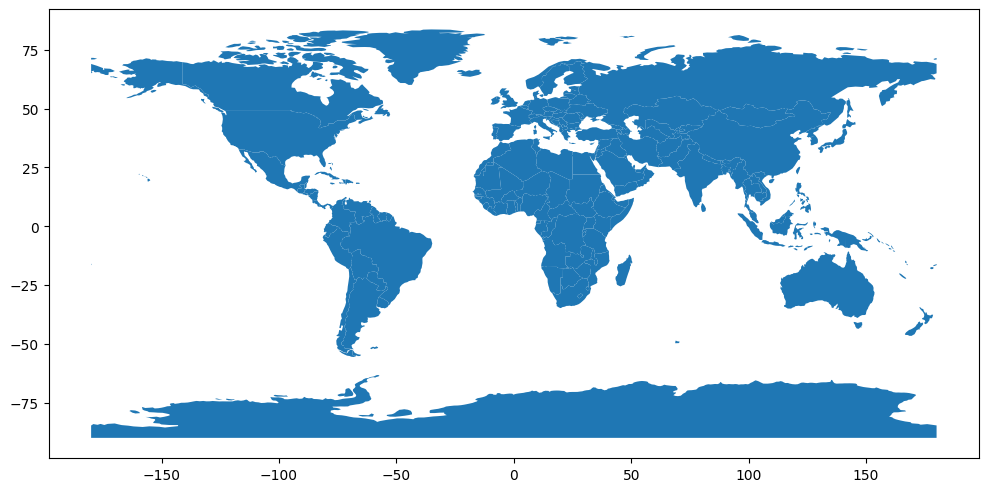

In [61]:
import geopandas as gpd

# Ruta al archivo ZIP
ruta_zip = r"C:\Users\lucas\Downloads\110m_cultural.zip"

# Cargar el shapefile desde el ZIP
world = gpd.read_file(f"zip://{ruta_zip}")

# Mostrar las primeras filas
print(world.head())

# Graficar rápidamente
world.plot(figsize=(12,8))



In [62]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
print(df_bio['country_name'].unique())
print(world['NAME_LONG'].unique())


['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']
['Fiji' 'Tanzania' 'Western Sahara' 'Canada' 'United States' 'Kazakhstan'
 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina' 'Chile'
 'Democratic Republic of the Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad'
 'Haiti' 'Dominican Republic' 'Russian Federation' 'Bahamas'
 'Falkland Islands / Malvinas' 'Norway' 'Greenland'
 'French Southern and Antarctic Lands' 'Timor-Leste' 'South Africa'
 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia'
 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala'
 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 "Côte d'Ivoire" 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique' 'Kingdom of 

In [64]:
# Lista de países a verificar
paises_a_verificar = ['Argentina', 'Brazil', 'Chile' ,'Colombia' ,'Mexico', 'Peru']

# Países que están en world['NAME_LONG']
paises_en_world = [pais for pais in paises_a_verificar if pais in world['NAME_LONG'].values]

# Países que NO están en world['NAME_LONG']
paises_no_en_world = [pais for pais in paises_a_verificar if pais not in world['NAME_LONG'].values]

print("Países encontrados en world['NAME_LONG']:", paises_en_world)
print("Países NO encontrados en world['NAME_LONG']:", paises_no_en_world)


Países encontrados en world['NAME_LONG']: ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
Países NO encontrados en world['NAME_LONG']: []


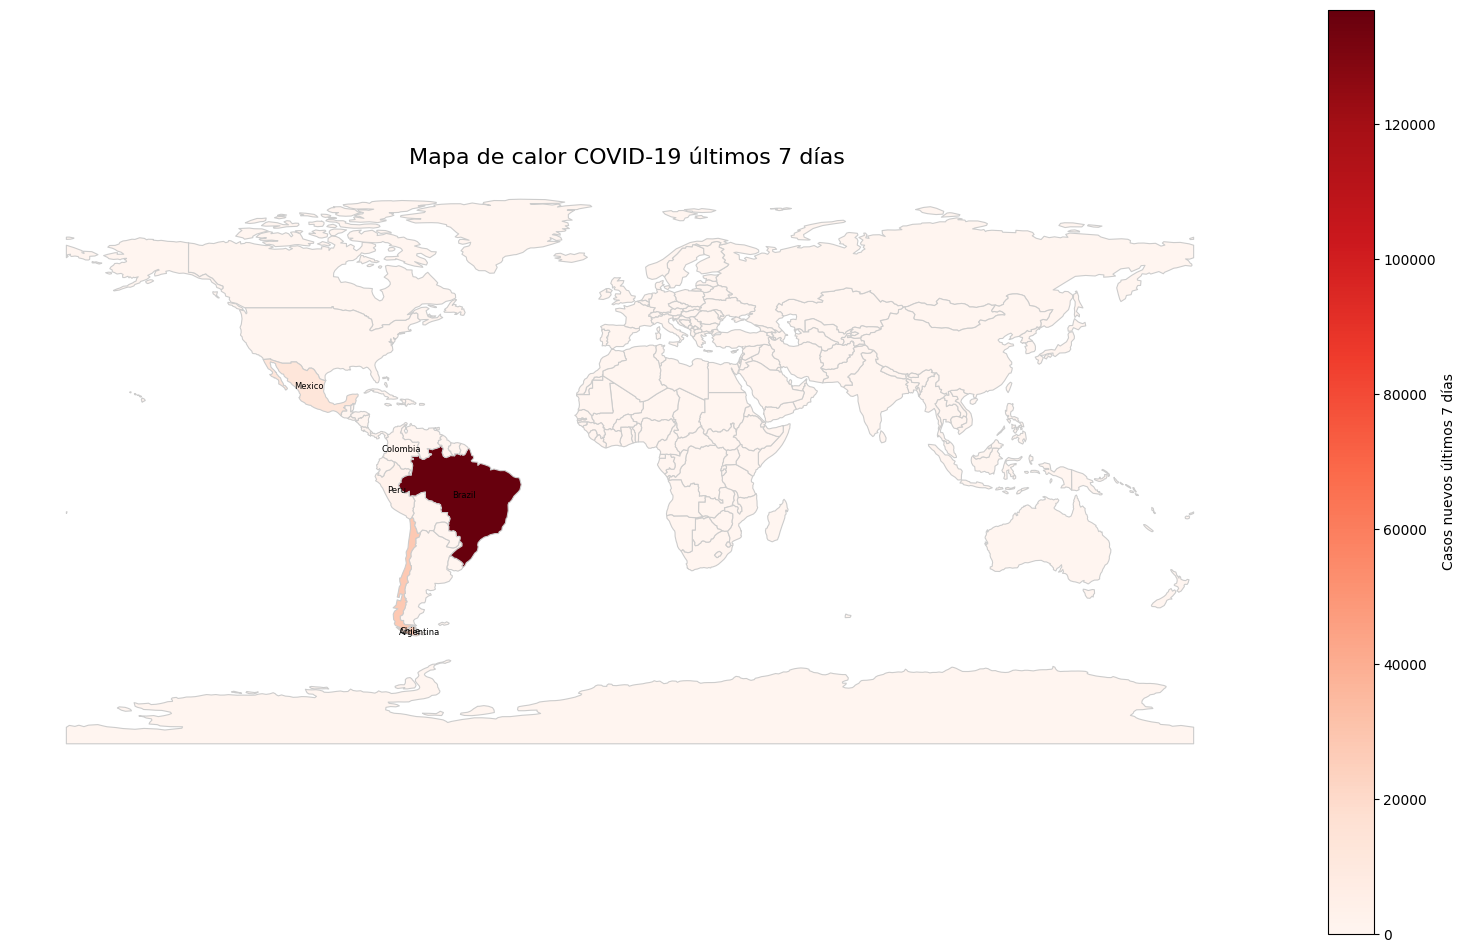

In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Últimos 7 días
df_bio.index = pd.to_datetime(df_bio.index)
fecha_max = df_bio.index.max()
fecha_min = fecha_max - pd.Timedelta(days=6)
ultimos_7 = df_bio[(df_bio.index >= fecha_min) & (df_bio.index <= fecha_max)]

# Sumar casos por país
casos_7dias = ultimos_7.groupby('country_name')['new_confirmed'].sum().reset_index()

# Merge con el mapa world
world_covid = world.merge(casos_7dias, how='left', left_on='NAME_LONG', right_on='country_name')
world_covid['new_confirmed'] = world_covid['new_confirmed'].fillna(0)

# Graficar
fig, ax = plt.subplots(1,1,figsize=(20,12))
world_covid.plot(
    column='new_confirmed',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Casos nuevos últimos 7 días"}
)

# Agregar nombres solo de países con datos
paises_con_datos = casos_7dias['country_name'].tolist()

for idx, row in world_covid.iterrows():
    if row['NAME_LONG'] in paises_con_datos:
        # Obtener el centroide
        if row['geometry'].geom_type == 'Polygon':
            x, y = row['geometry'].centroid.coords[0]
        elif row['geometry'].geom_type == 'MultiPolygon':
            x, y = row['geometry'].geoms[0].centroid.coords[0]
        # Colocar el nombre
        ax.text(x, y, row['NAME_LONG'], fontsize=6, ha='center', va='center')

ax.set_title("Mapa de calor COVID-19 últimos 7 días ", fontsize=16)
ax.axis('off')
plt.show()



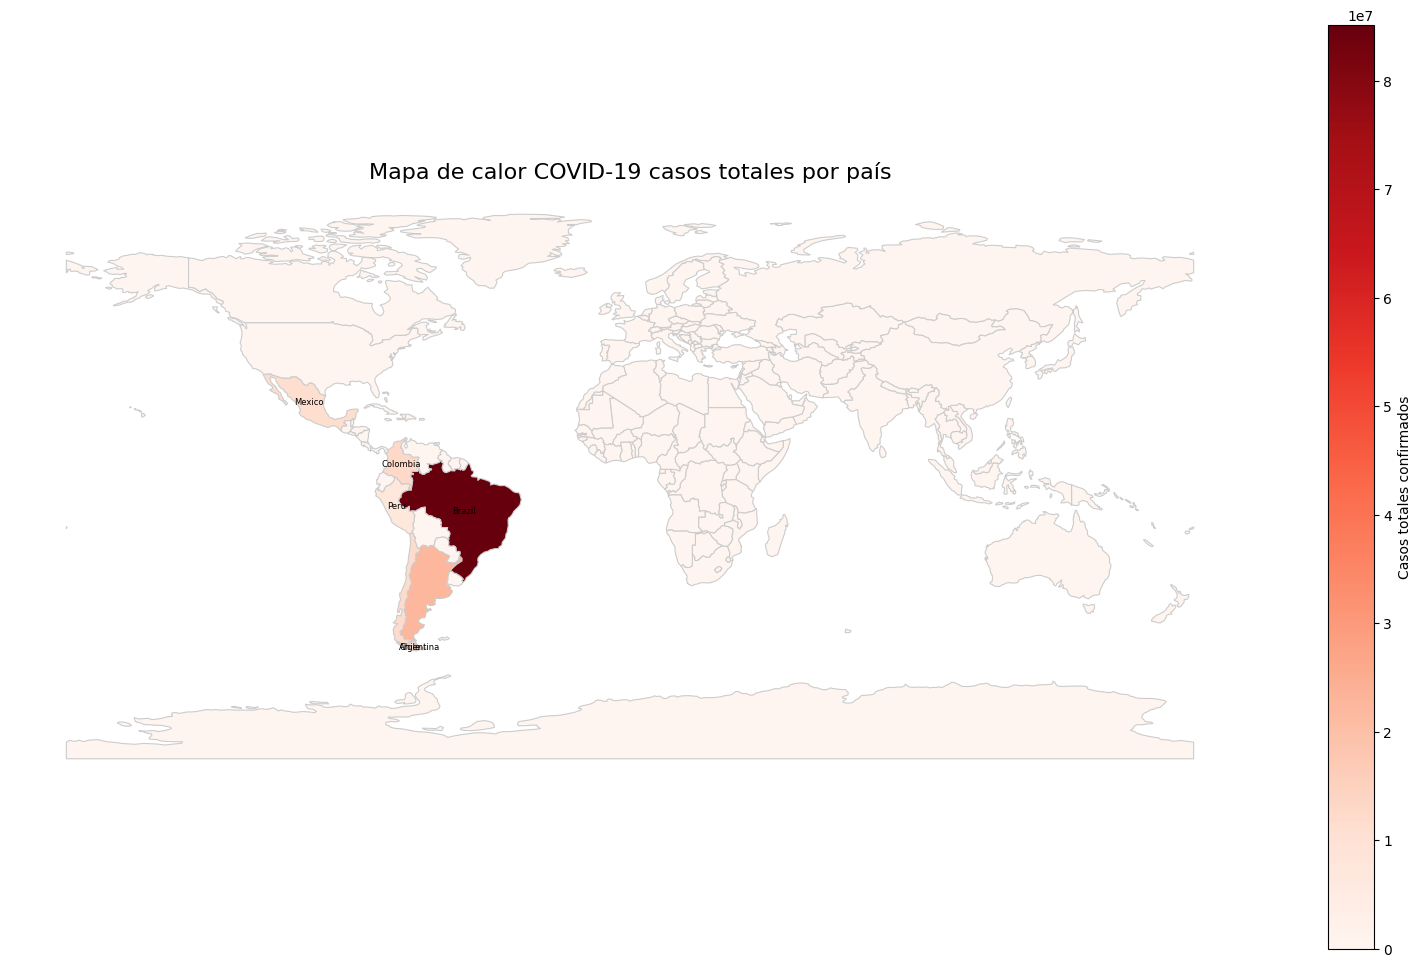

In [66]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ===== 1. Sumar casos totales por país =====
casos_totales = df_bio.groupby('country_name')['new_confirmed'].sum().reset_index()

# ===== 2. Merge con el mapa world =====
world_covid_total = world.merge(
    casos_totales, 
    how='left', 
    left_on='NAME_LONG', 
    right_on='country_name'
)

# Llenar NaN con 0 para países sin datos
world_covid_total['new_confirmed'] = world_covid_total['new_confirmed'].fillna(0)

# ===== 3. Graficar =====
fig, ax = plt.subplots(1, 1, figsize=(20,12))
world_covid_total.plot(
    column='new_confirmed',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Casos totales confirmados"}
)

# ===== 4. Agregar nombres solo de países con datos =====
paises_con_datos = casos_totales['country_name'].tolist()

for idx, row in world_covid_total.iterrows():
    if row['NAME_LONG'] in paises_con_datos:
        # Obtener el centroide
        if row['geometry'].geom_type == 'Polygon':
            x, y = row['geometry'].centroid.coords[0]
        elif row['geometry'].geom_type == 'MultiPolygon':
            x, y = row['geometry'].geoms[0].centroid.coords[0]
        # Colocar el nombre
        ax.text(x, y, row['NAME_LONG'], fontsize=6, ha='center', va='center')

# ===== 5. Ajustes finales =====
ax.set_title("Mapa de calor COVID-19 casos totales por país", fontsize=16)
ax.axis('off')
plt.show()


In [67]:
df_bio.head(10)

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina          7,767   
2021-01-03           AR           AR    Argentina          4,934   
2021-01-04           AR           AR    Argentina         13,953   
2021-01-05           AR           AR    Argentina         14,085   
2021-01-06           AR           AR    Argentina         14,496   
2021-01-07           AR           AR    Argentina         13,722   
2021-01-08           AR           AR    Argentina         13,932   
2021-01-09           AR           AR    Argentina          9,959   
2021-01-10           AR           AR    Argentina          5,174   
2021-01-11           AR           AR    Argentina         13,076   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166             1,670,634               46,688   
2021-01-03           157             1,675,568               46,845   
2021-01-04           157             1,689,521               47,002   
2021-01-05           160             1,703,606               47,162   
2021-01-06           131             1,718,102               47,293   
2021-01-07           160             1,731,824               47,453   
2021-01-08           162             1,745,756               47,615   
2021-01-09           158             1,755,715               47,773   
2021-01-10           165             1,760,889               47,938   
2021-01-11           170             1,773,965               48,108   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 20,334  44,938,712   
2021-01-03                                 20,529  44,938,712   
2021-01-04                                 25,164  44,938,712   
2021-01-05                                 29,852  44,938,712   
2021-01-06                                 34,162  44,938,712   
2021-01-07                                 42,092  44,938,712   
2021-01-08                                 54,090  44,938,712   
2021-01-09                                 58,552  44,938,712   
2021-01-10                                 59,043  44,938,712   
2021-01-11                                 67,496  44,938,712   

            population_male  population_female  population_rural  \
date                                                               
2021-01-02       19,523,766         20,593,330         3,599,141   
2021-01-03       19,523,766         20,593,330         3,599,141   
2021-01-04       19,523,766         20,593,330         3,599,141   
2021-01-05       19,523,766         20,593,330         3,599,141   
2021-01-06       19,523,766         20,593,330         3,599,141   
2021-01-07       19,523,766         20,593,330         3,599,141   
2021-01-08       19,523,766         20,593,330         3,599,141   
2021-01-09       19,523,766         20,593,330         3,599,141   
2021-01-10       19,523,766         20,593,330         3,599,141   
2021-01-11       19,523,766         20,593,330         3,599,141   

            population_urban  population_density  human_development_index  \
date                                                                        
2021-01-02        41,339,571                  17                        1   
2021-01-03        41,339,571                  17                        1   
2021-01-04        41,339,571                  17                        1   
2021-01-05        41,339,571                  17                        1   
2021-01-06        41,339,571                  17                        1   
2021-01-07        41,339,571                  17                        1   
2021-01-08        41,339,571                  17                        1   
2021-01-09        41,339,571                  17  

In [68]:
paises = ["Argentina", "Chile", "Colombia", "Peru", "Brazil", "Mexico"]

for c in paises:
    df_pais = df_bio[df_bio["country_name"] == c]

    # Casos confirmados
    casos_confirmados_nuevos = df_pais["cumulative_confirmed"].max()
    poblacion = df_pais["population"].max()
    porcentaje_poblacion_nuevos = (casos_confirmados_nuevos / poblacion) * 100

    # Muertes
    muertes = df_pais["cumulative_deceased"].max()
    porcentaje_muertes = (muertes / poblacion) * 100

    # Vacunas
    vacunas = df_pais["cumulative_vaccine_doses_administered"].max()
    porcentaje_vacunas = (vacunas / poblacion) * 100

    # Mostrar resultados
    print(f"{c}: % Casos={porcentaje_poblacion_nuevos:.2f}%, % Muertes={porcentaje_muertes:.2f}%, % Vacunas={porcentaje_vacunas:.2f}%")


resultados = []

for c in paises:
    df_pais = df_bio[df_bio["country_name"] == c]

    casos = df_pais["cumulative_confirmed"].max()
    muertes = df_pais["cumulative_deceased"].max()
    vacunas = df_pais["cumulative_vaccine_doses_administered"].max()
    poblacion = df_pais["population"].max()

    resultados.append({
        "Pais": c,
        "% Casos": (casos / poblacion) * 100,
        "% Muertes": (muertes / poblacion) * 100,
        "% Vacunas": (vacunas / poblacion) * 100
    })

df_resultado = pd.DataFrame(resultados)
print(df_resultado)











Argentina: % Casos=21.58%, % Muertes=0.29%, % Vacunas=243.01%
Chile: % Casos=26.00%, % Muertes=0.35%, % Vacunas=353.96%
Colombia: % Casos=12.39%, % Muertes=0.31%, % Vacunas=172.09%
Peru: % Casos=14.05%, % Muertes=0.74%, % Vacunas=284.61%
Brazil: % Casos=16.26%, % Muertes=0.32%, % Vacunas=163.66%
Mexico: % Casos=3.66%, % Muertes=0.27%, % Vacunas=188.91%
        Pais  % Casos  % Muertes  % Vacunas
0  Argentina       22          0        243
1      Chile       26          0        354
2   Colombia       12          0        172
3       Peru       14          1        285
4     Brazil       16          0        164
5     Mexico        4          0        189


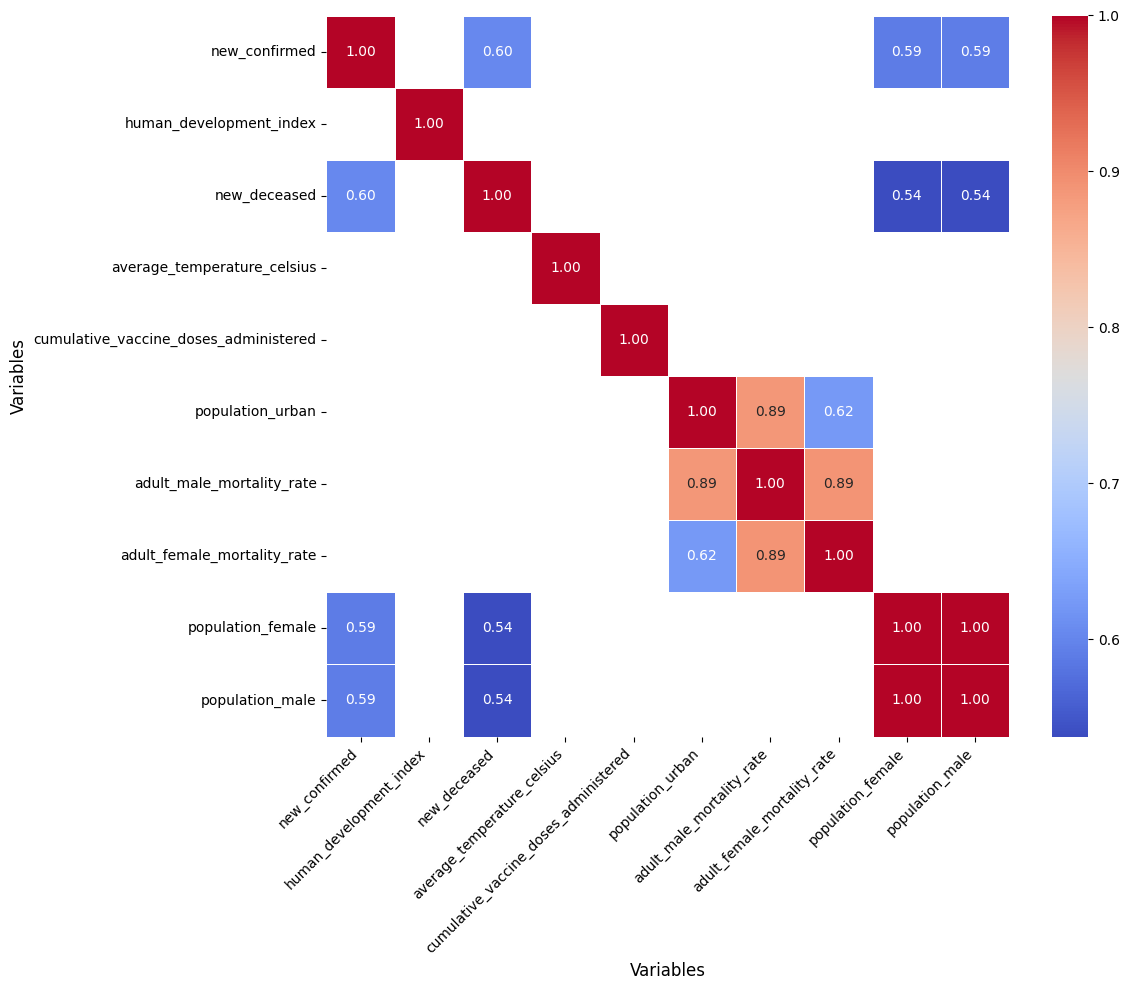

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_correlacion = [
    "new_confirmed",
    "human_development_index",
    "new_deceased",
    "average_temperature_celsius",
    "cumulative_vaccine_doses_administered",
    "population_urban",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate",
    "population_female",
    "population_male",
]

# Seleccionar las columnas
df_seleccionado_matriz = df_bio[variables_correlacion]

# Calcular correlación
corr = df_seleccionado_matriz.corr()

# Filtrar solo valores con magnitud >= 0.5
corr_filtrada = corr.mask(abs(corr) < 0.5)

# Crear figura
plt.figure(figsize=(12,10))

# Graficar heatmap
sns.heatmap(corr_filtrada, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", cbar=True)

# Título y etiquetas de ejes

plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Rotar etiquetas de los ejes para mejor visibilidad
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Mostrar
plt.tight_layout()
plt.show()


['adult_female_mortality_rate', 'adult_male_mortality_rate', 'area_rural_sq_km', 'area_sq_km', 'area_urban_sq_km', 'average_temperature_celsius', 'comorbidity_mortality_rate', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'diabetes_prevalence', 'gdp_per_capita_usd', 'gdp_usd', 'human_development_index', 'infant_mortality_rate', 'latitude', 'life_expectancy', 'longitude', 'maximum_temperature_celsius', 'minimum_temperature_celsius', 'new_confirmed', 'new_deceased', 'nurses_per_1000', 'physicians_per_1000', 'pollution_mortality_rate', 'population', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'population_density', 'population_female', 'population_largest_city', 'population_male', 'population_rural', 'population_urban', 'rainfall_mm', 'relative_humidity', 'smoking_prevalen

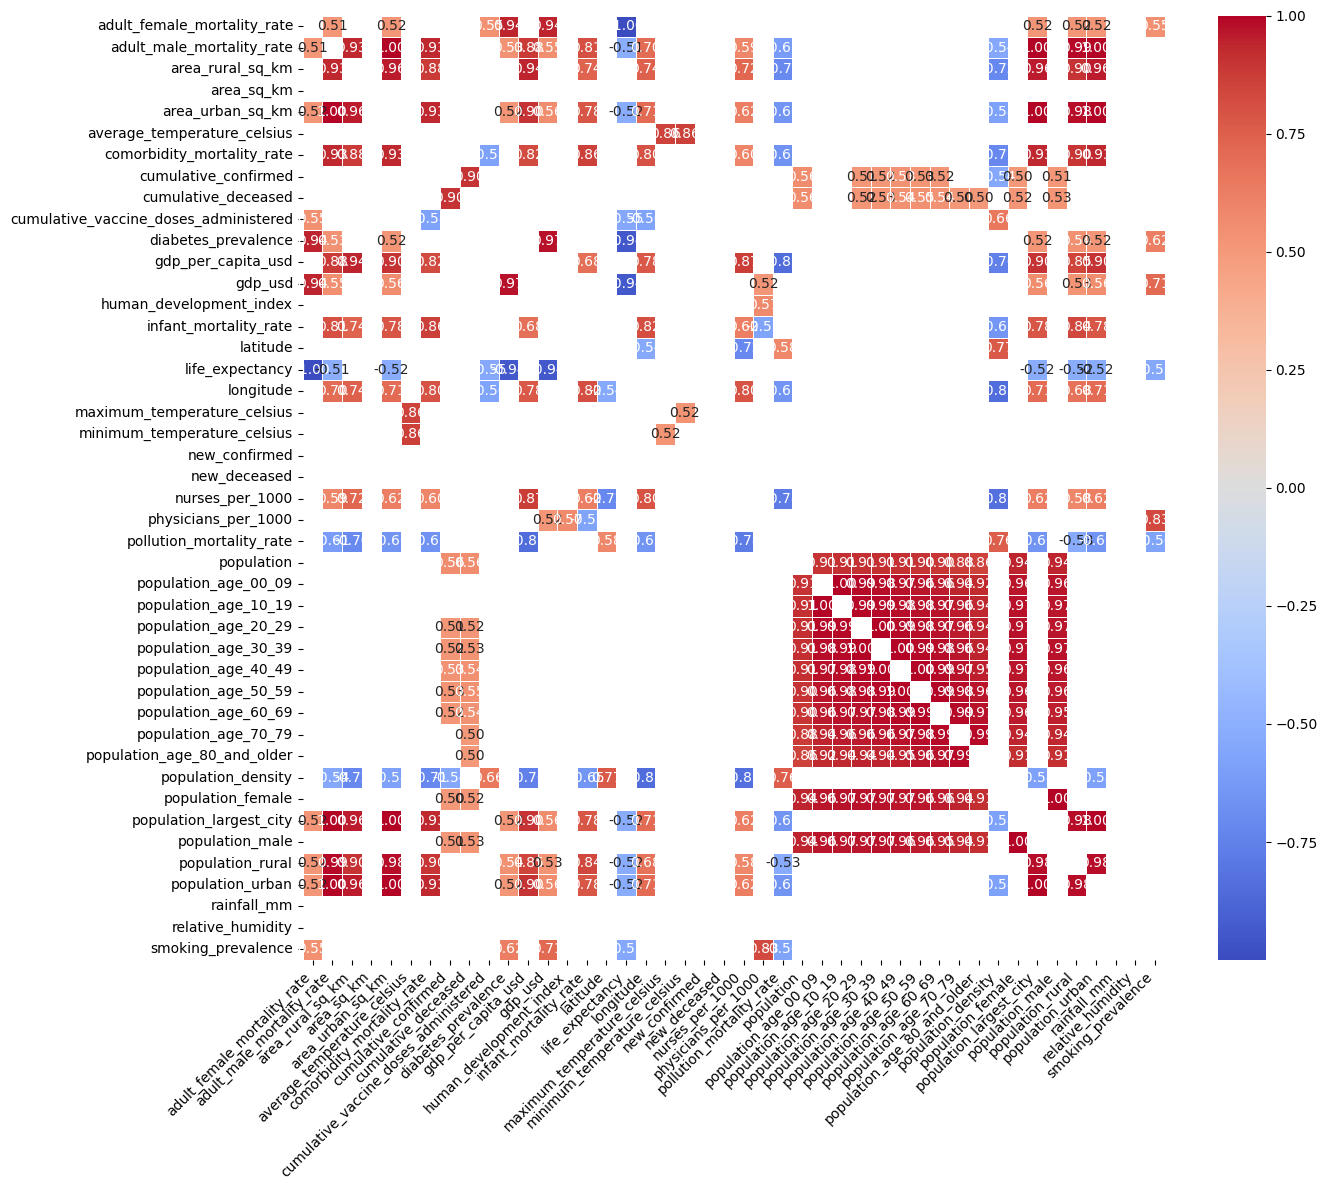

In [70]:
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered",
    "population",
    "population_male",
    "population_female",
    "population_rural",
    "population_urban",
    "population_density",
    "human_development_index",
    "population_age_00_09",
    "population_age_10_19",
    "population_age_20_29",
    "population_age_30_39",
    "population_age_40_49",
    "population_age_50_59",
    "population_age_60_69",
    "population_age_70_79",
    "population_age_80_and_older",
    "gdp_usd",
    "gdp_per_capita_usd",
    "latitude",
    "longitude",
    "area_sq_km",
    "smoking_prevalence",
    "diabetes_prevalence",
    "infant_mortality_rate",
    "nurses_per_1000",
    "physicians_per_1000",
    "average_temperature_celsius",
    "minimum_temperature_celsius",
    "maximum_temperature_celsius",
    "rainfall_mm",
    "relative_humidity",
    "population_largest_city",
    "area_rural_sq_km",
    "area_urban_sq_km",
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate",
    "pollution_mortality_rate",
    "comorbidity_mortality_rate"
]
variables_limpias = sorted(set(variables_correlacion))
print(variables_limpias)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_sel = df_bio[variables_limpias]

corr = df_sel.corr(method="spearman")
corr_filtrada = corr.mask(np.abs(corr) < 0.5)

# Ocultar la diagonal (1.0)
np.fill_diagonal(corr_filtrada.values, np.nan)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


['comorbidity_mortality_rate', 'cumulative_confirmed', 'cumulative_deceased', 'diabetes_prevalence', 'new_confirmed', 'new_deceased', 'pollution_mortality_rate', 'smoking_prevalence']


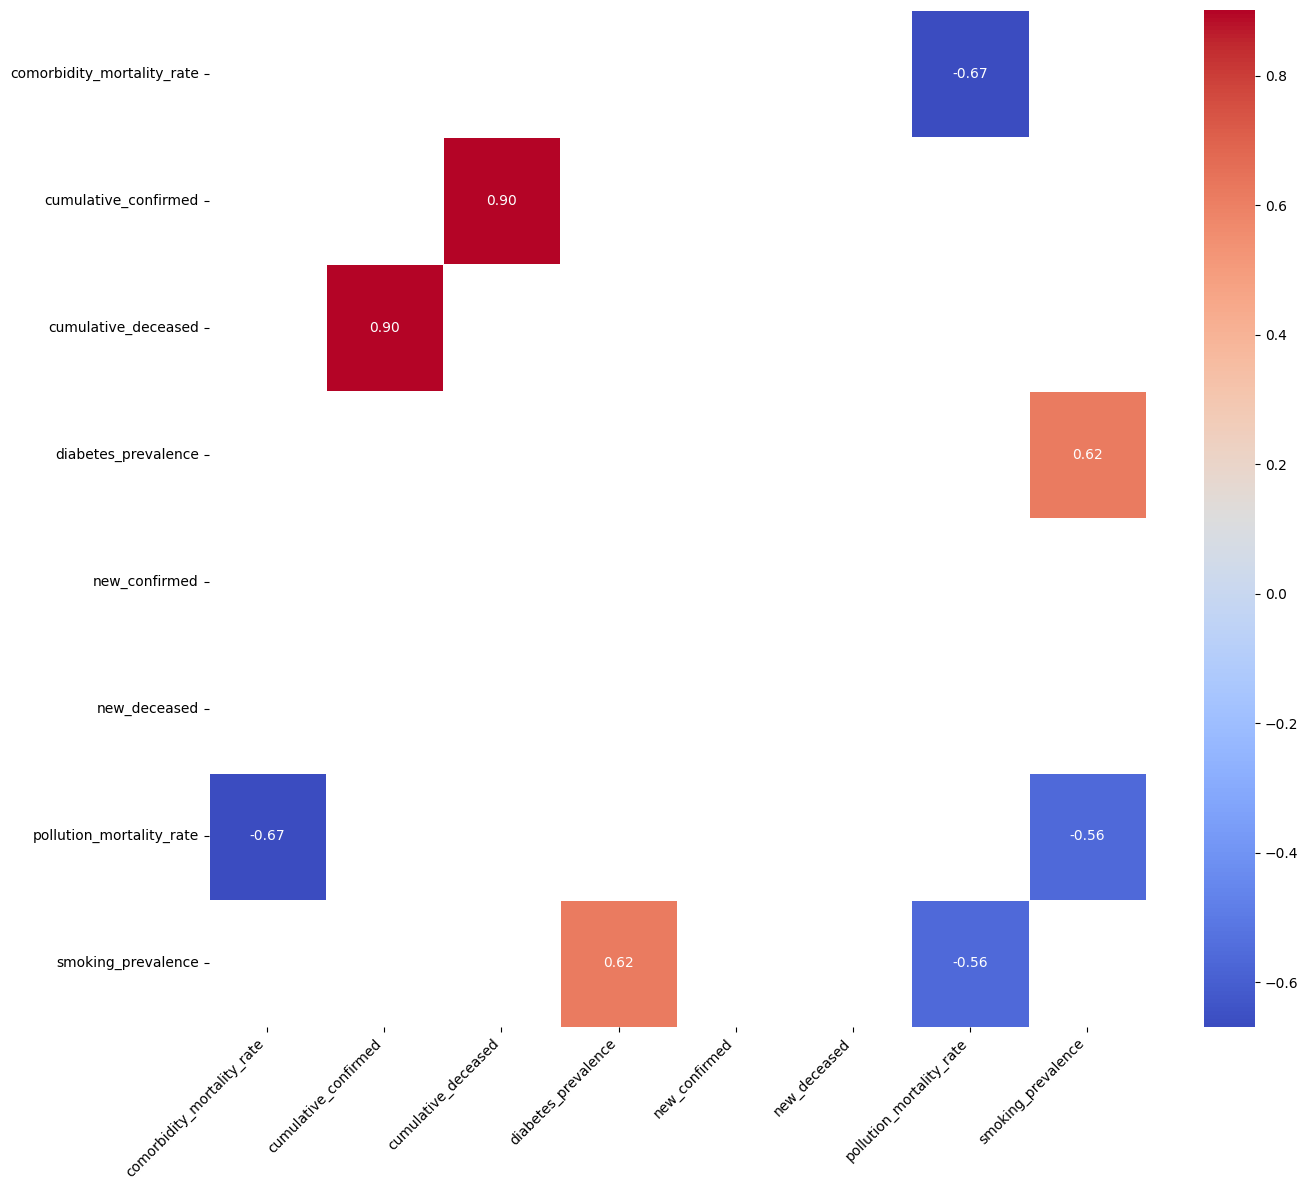

In [71]:
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "smoking_prevalence",
    "diabetes_prevalence",
    "pollution_mortality_rate",
    "comorbidity_mortality_rate"
]
variables_limpias = sorted(set(variables_correlacion))
print(variables_limpias)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_sel = df_bio[variables_limpias]

corr = df_sel.corr(method="spearman")
corr_filtrada = corr.mask(np.abs(corr) < 0.5)

# Ocultar la diagonal (1.0)
np.fill_diagonal(corr_filtrada.values, np.nan)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

['cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'gdp_per_capita_usd', 'gdp_usd', 'human_development_index', 'new_confirmed', 'new_deceased', 'population', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'population_density', 'population_female', 'population_male', 'population_rural', 'population_urban']


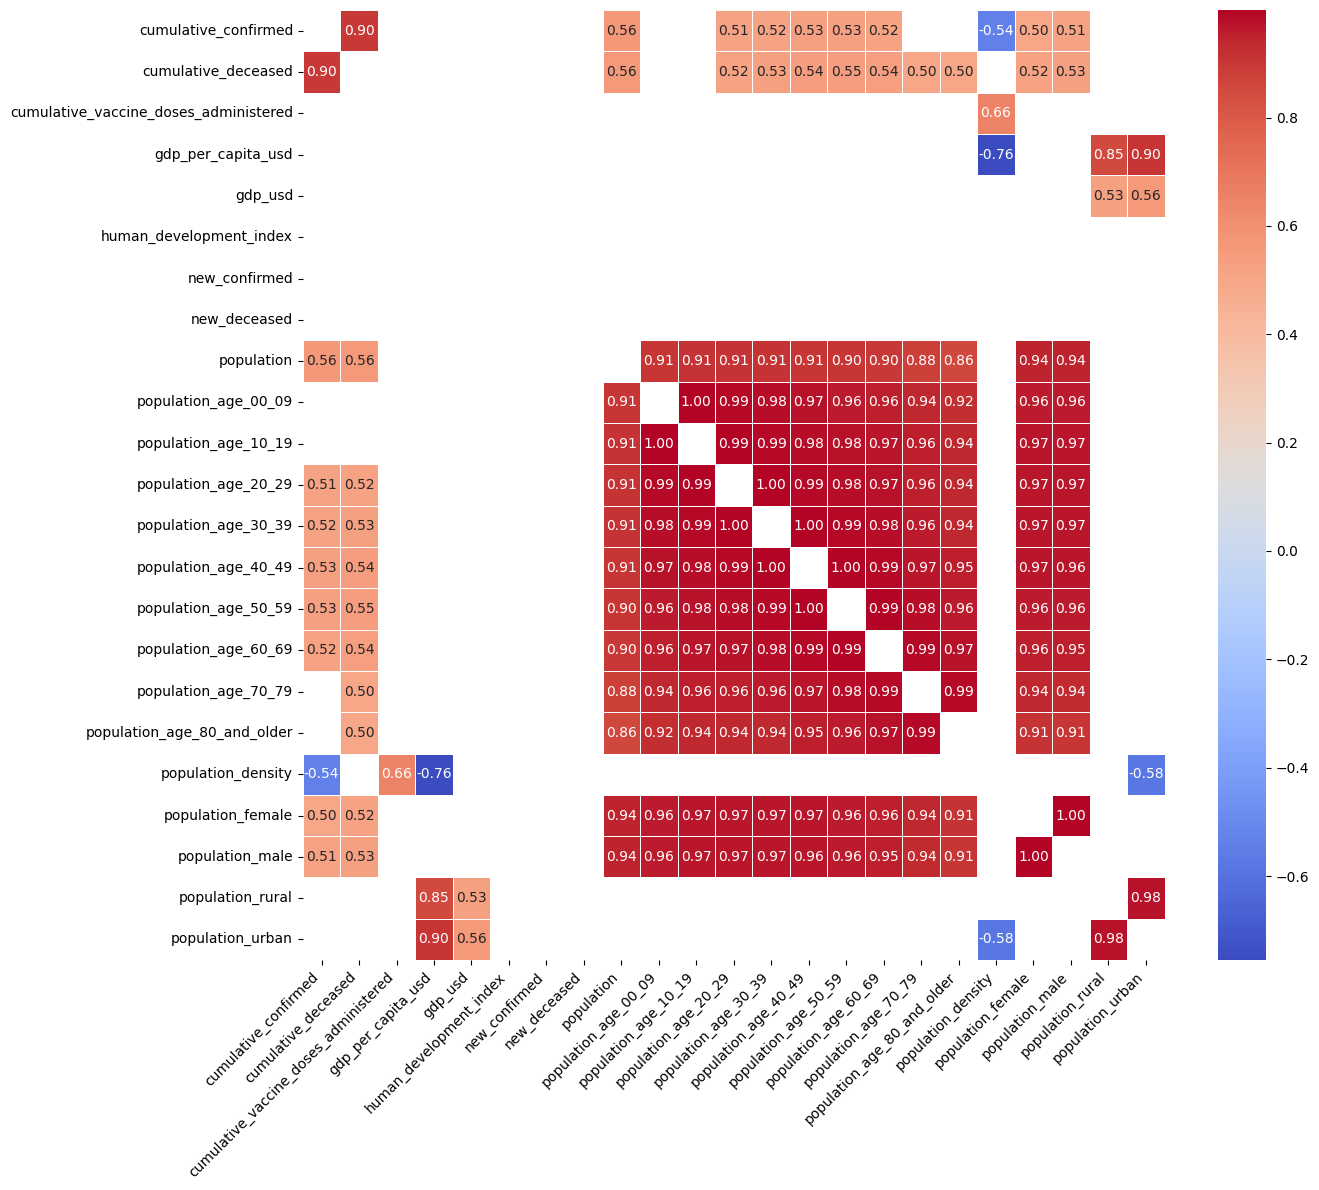

In [72]:
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered",
    "population",
    "population_male",
    "population_female",
    "population_rural",
    "population_urban",
    "population_density",
    "human_development_index",
    "population_age_00_09",
    "population_age_10_19",
    "population_age_20_29",
    "population_age_30_39",
    "population_age_40_49",
    "population_age_50_59",
    "population_age_60_69",
    "population_age_70_79",
    "population_age_80_and_older",
    "gdp_usd",
    "gdp_per_capita_usd",
    
   
]
variables_limpias = sorted(set(variables_correlacion))
print(variables_limpias)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_sel = df_bio[variables_limpias]

corr = df_sel.corr(method="spearman")
corr_filtrada = corr.mask(np.abs(corr) < 0.5)

# Ocultar la diagonal (1.0)
np.fill_diagonal(corr_filtrada.values, np.nan)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


['adult_female_mortality_rate', 'adult_male_mortality_rate', 'average_temperature_celsius', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'gdp_per_capita_usd', 'gdp_usd', 'human_development_index', 'life_expectancy', 'maximum_temperature_celsius', 'minimum_temperature_celsius', 'new_confirmed', 'new_deceased', 'nurses_per_1000', 'physicians_per_1000', 'rainfall_mm', 'relative_humidity']


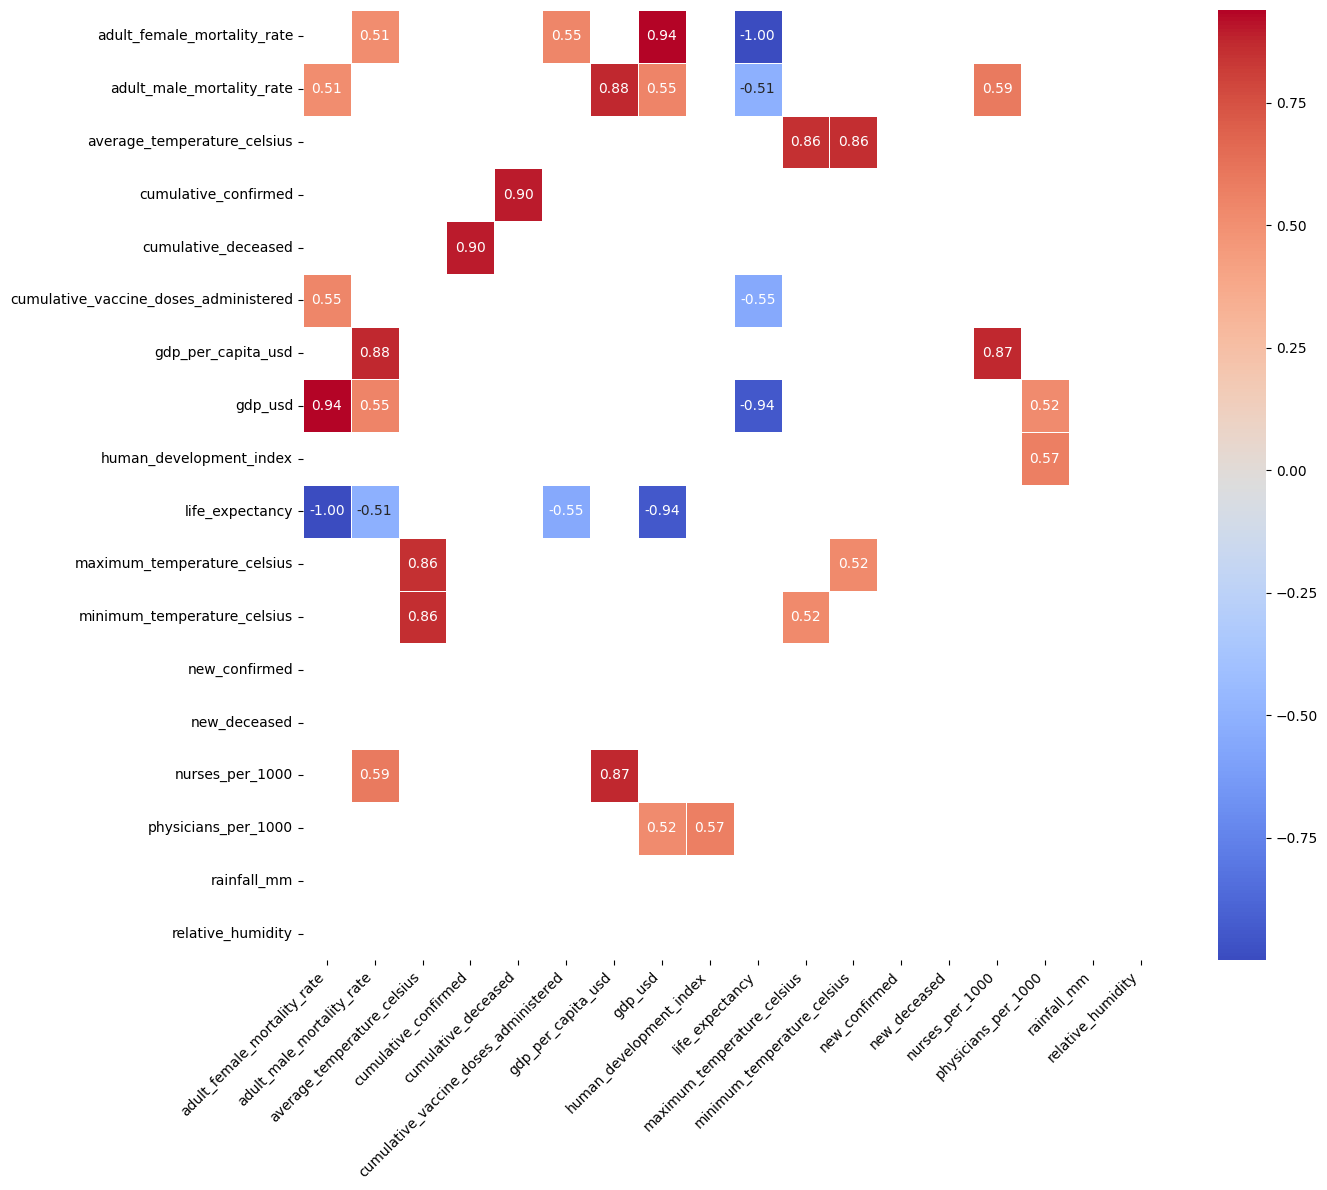

In [73]:
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered",
    
    "human_development_index",
    
    "gdp_usd",
    "gdp_per_capita_usd",
   
 
    "nurses_per_1000",
    "physicians_per_1000",
    "average_temperature_celsius",
    "minimum_temperature_celsius",
    "maximum_temperature_celsius",
    "rainfall_mm",
    "relative_humidity",
   
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate",
    
]
variables_limpias = sorted(set(variables_correlacion))
print(variables_limpias)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_sel = df_bio[variables_limpias]

corr = df_sel.corr(method="spearman")
corr_filtrada = corr.mask(np.abs(corr) < 0.5)

# Ocultar la diagonal (1.0)
np.fill_diagonal(corr_filtrada.values, np.nan)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [74]:


# Variables para calcular el coeficiente de variación
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered", 
    "nurses_per_1000",
    "physicians_per_1000",
    "average_temperature_celsius",
    "minimum_temperature_celsius",
    "maximum_temperature_celsius",
    "rainfall_mm",
    "relative_humidity",
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate"
]

# DataFrame con coeficientes de variación por país
df_cv = (
    df_bio
    .groupby("country_name")[variables_correlacion]
    .apply(lambda x: x.std() / x.mean())
)

# Ver resultado
df_cv.head()


new_confirmed  new_deceased  cumulative_confirmed  \
country_name                                                      
Argentina                19            14                    10   
Brazil                   35            40                    26   
Chile                    10            43                     8   
Colombia                 22            19                    13   
Mexico                   42            60                    19   

              cumulative_deceased  cumulative_vaccine_doses_administered  \
country_name                                                               
Argentina                       9                                     16   
Brazil                         25                                      1   
Chile                           7                                      0   
Colombia                       12                                      1   
Mexico                         46                                      0   

              nurses_per_1000  physicians_per_1000  \
country_name                                         
Argentina                   0                    0   
Brazil                      0                    0   
Chile                       0                    0   
Colombia                    0                    0   
Mexico                      0                    0   

              average_temperature_celsius  minimum_temperature_celsius  \
country_name                                                             
Argentina                               0                            2   
Brazil                                  0                            0   
Chile                                   0                            1   
Colombia                                0                            0   
Mexico                                  0                            1   

              maximum_temperature_celsius  rainfall_mm  relative_humidity  \
country_name                                                                
Argentina                               0            3                  0   
Brazil                                  0            5                  0   
Chile                                   0            3                  0   
Colombia                                0            2                  0   
Mexico                                  0            2                  0   

              life_expectancy  adult_male_mortality_rate  \
country_name                                               
Argentina                   0                          0   
Brazil                      0                          0   
Chile                       0                          0   
Colombia                    0                          0   
Mexico                      0                          0   

              adult_female_mortality_rate  
country_name                               
Argentina                               0  
Brazil                                  0  
Chile                                   0  
Colombia                                0  
Mexico                                  0

In [75]:
# Variables para calcular el coeficiente de variación
variables_correlacion = [
    "new_confirmed",
    "new_deceased",
    "cumulative_confirmed",
    "cumulative_deceased",
    "cumulative_vaccine_doses_administered", 
    "nurses_per_1000",
    "physicians_per_1000",
    "average_temperature_celsius",
    "minimum_temperature_celsius",
    "maximum_temperature_celsius",
    "rainfall_mm",
    "relative_humidity",
    "life_expectancy",
    "adult_male_mortality_rate",
    "adult_female_mortality_rate"
]

# Coeficiente de variación global (sin agrupar por país)
df_cv = (
    df_bio[variables_correlacion]
    .std() / df_bio[variables_correlacion]
    .mean()
)

# Ver resultado
df_cv


new_confirmed                           33
new_deceased                            38
cumulative_confirmed                    23
cumulative_deceased                     22
cumulative_vaccine_doses_administered    1
nurses_per_1000                          1
physicians_per_1000                      0
average_temperature_celsius              0
minimum_temperature_celsius              1
maximum_temperature_celsius              0
rainfall_mm                              3
relative_humidity                        0
life_expectancy                          0
adult_male_mortality_rate                0
adult_female_mortality_rate              0
dtype: float64

In [76]:
df_bio.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina          7,767   
2021-01-03           AR           AR    Argentina          4,934   
2021-01-04           AR           AR    Argentina         13,953   
2021-01-05           AR           AR    Argentina         14,085   
2021-01-06           AR           AR    Argentina         14,496   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166             1,670,634               46,688   
2021-01-03           157             1,675,568               46,845   
2021-01-04           157             1,689,521               47,002   
2021-01-05           160             1,703,606               47,162   
2021-01-06           131             1,718,102               47,293   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 20,334  44,938,712   
2021-01-03                                 20,529  44,938,712   
2021-01-04                                 25,164  44,938,712   
2021-01-05                                 29,852  44,938,712   
2021-01-06                                 34,162  44,938,712   

            population_male  population_female  population_rural  \
date                                                               
2021-01-02       19,523,766         20,593,330         3,599,141   
2021-01-03       19,523,766         20,593,330         3,599,141   
2021-01-04       19,523,766         20,593,330         3,599,141   
2021-01-05       19,523,766         20,593,330         3,599,141   
2021-01-06       19,523,766         20,593,330         3,599,141   

            population_urban  population_density  human_development_index  \
date                                                                        
2021-01-02        41,339,571                  17                        1   
2021-01-03        41,339,571                  17                        1   
2021-01-04        41,339,571                  17                        1   
2021-01-05        41,339,571                  17                        1   
2021-01-06        41,339,571                  17                        1   

            population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6,718,871             7,045,513             6,430,658   
2021-01-03             6,718,871             7,045,513             6,430,658   
2021-01-04             6,718,871             7,045,513             6,430,658   
2021-01-05             6,718,871             7,045,513             6,430,658   
2021-01-06             6,718,871             7,045,513             6,430,658   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5,777,148             4,507,125             3,911,943   
2021-01-03             5,777,148             4,507,125             3,911,943   
2021-01-04             5,777,148             4,507,125             3,911,943   
2021-01-05             5,777,148             4,507,125             3,911,943   
2021-01-06             5,777,148             4,507,125             3,911,943   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2,914,251             1,817,557   
2021-01-03             2,914,251             1,817,557   
2021-01-04             2,914,251             1,817,557   
2021-01-05             2,914,251             1,817,557   
2021-01-06             2,914,251             1,817,557   

            population_age_80_and_

In [77]:
# Filtrar solo Chile
df_chile = df_bio[df_bio['country_name'] == 'Chile']

# Encontrar el índice de la fila con el máximo de new_deceased
idx_max = df_chile['new_deceased'].idxmax()

# Obtener la fila completa
registro_max = df_chile.loc[idx_max]

print("Registro con mayor new_deceased en Chile:")
print(registro_max)



Registro con mayor new_deceased en Chile:
           location_key country_code country_name  new_confirmed  \
date                                                               
2022-03-21           CL           CL        Chile          7,555   
2022-03-21        CL_AI           CL        Chile             75   
2022-03-21  CL_AI_11101           CL        Chile            162   
2022-03-21  CL_AI_11102           CL        Chile              3   
2022-03-21  CL_AI_11201           CL        Chile             93   
...                 ...          ...          ...            ...   
2022-03-21  CL_VS_05706           CL        Chile             49   
2022-03-21  CL_VS_05801           CL        Chile            269   
2022-03-21  CL_VS_05802           CL        Chile             66   
2022-03-21  CL_VS_05803           CL        Chile             20   
2022-03-21  CL_VS_05804           CL        Chile            210   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
da

In [78]:
# Filtrar solo Chile
df_chile = df_bio[df_bio['country_name'] == 'Chile']

# Calcular la media de new_deceased para Chile
media_muertes = df_chile['new_deceased'].mean()

# Reemplazar el valor del 2022-03-21 por la media
df_bio.loc[(df_bio['country_name'] == 'Chile') & (df_bio.index == '2022-03-21'), 'new_deceased'] = media_muertes

# Comprobar que se reemplazó
print(df_bio.loc[(df_bio['country_name'] == 'Chile') & (df_bio.index == '2022-03-21'), 'new_deceased'])


date
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
             ..
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
2022-03-21   1 
Name: new_deceased, Length: 363, dtype: float64


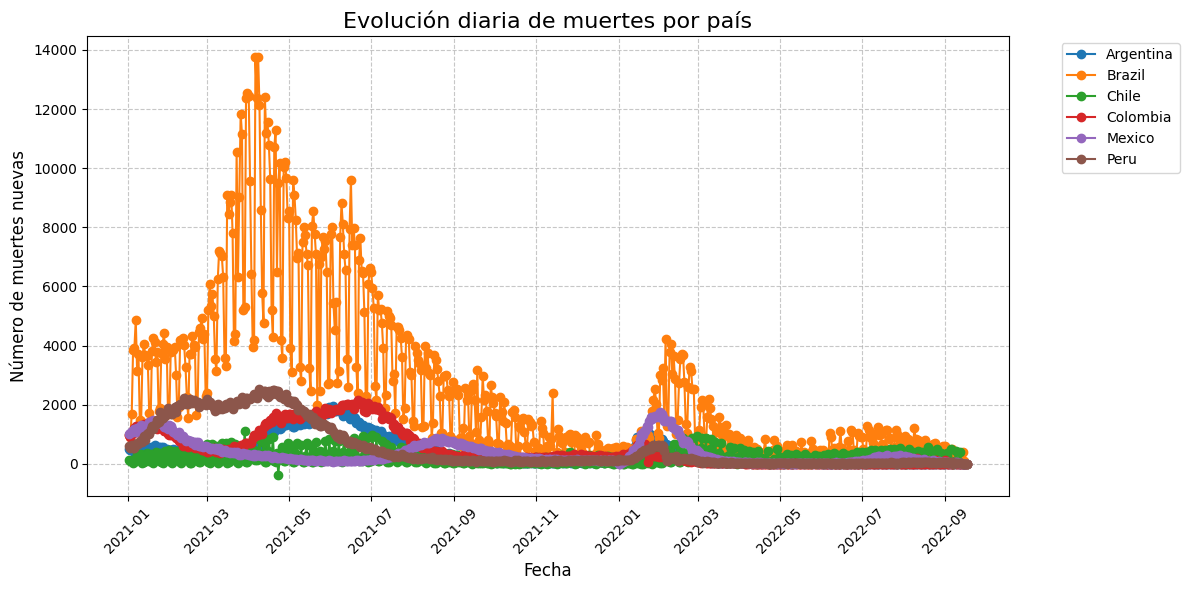

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse que el índice sea datetime
df_bio.index = pd.to_datetime(df_bio.index)

# ===== Muertes diarias por país =====
muertes_diarias_pais = df_bio.groupby('country_name')['new_deceased'].resample('D').sum()

# Convertir a DataFrame para graficar
muertes_df = muertes_diarias_pais.reset_index()

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(12,6))

# Graficar cada país
for pais in muertes_df['country_name'].unique():
    datos_pais = muertes_df[muertes_df['country_name'] == pais]
    ax.plot(
        datos_pais['date'],
        datos_pais['new_deceased'],
        marker='o',
        label=pais
    )

# Títulos y etiquetas usando Axes
ax.set_title("Evolución diaria de muertes por país", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Número de muertes nuevas", fontsize=12)

# Ajustes estéticos
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [80]:
df_bio[df_bio['country_name'] == 'Mexico'].iloc[100]


location_key                                           MX
country_code                                           MX
country_name                                       Mexico
new_confirmed                                       5,099
new_deceased                                          261
cumulative_confirmed                            2,324,113
cumulative_deceased                               228,753
cumulative_vaccine_doses_administered          11,703,164
population                                    110,991,953
population_male                                54,855,231
population_female                              57,481,307
population_rural                               24,948,670
population_urban                              102,626,859
population_density                                     66
human_development_index                                 1
population_age_00_09                           21,575,859
population_age_10_19                           21,966,049
population_age

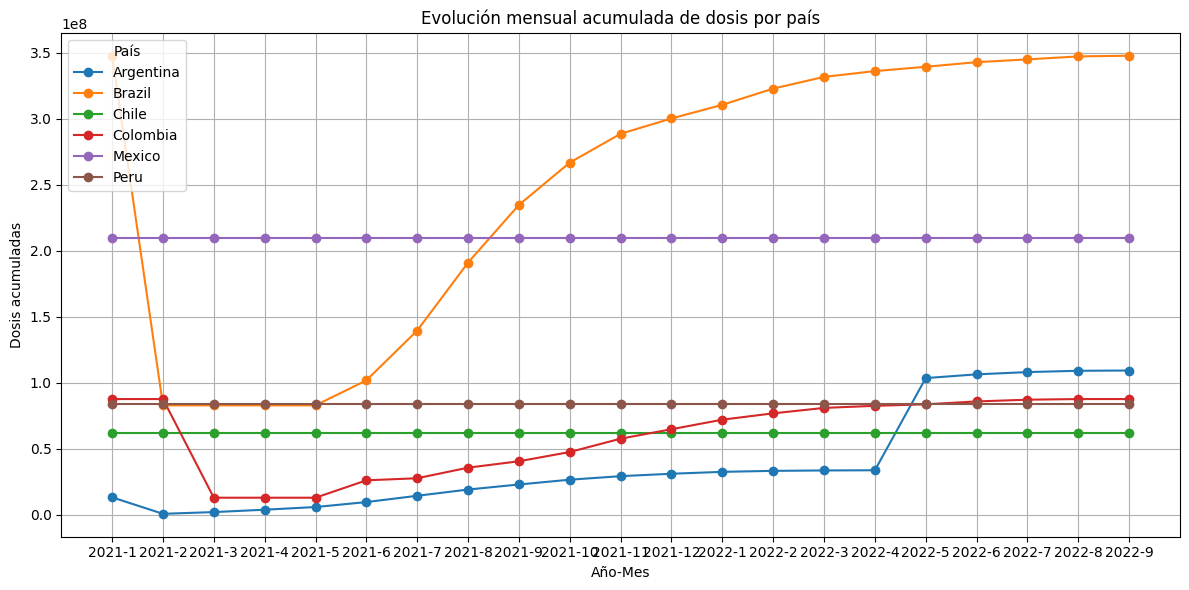

In [81]:
df_bio["year"] = df_bio.index.year
df_bio["mes"] = df_bio.index.month

dosis_por_mes = (
    df_bio.groupby(["year", "mes", "country_name"])["cumulative_vaccine_doses_administered"]
          .max()
          .reset_index()
)
fig, ax = plt.subplots(figsize=(12,6))

for pais in dosis_por_mes["country_name"].unique():
    df_pais = dosis_por_mes[dosis_por_mes["country_name"] == pais]
    df_pais = df_pais.sort_values(["year", "mes"])

    ax.plot(
        df_pais["year"].astype(str) + "-" + df_pais["mes"].astype(str),
        df_pais["cumulative_vaccine_doses_administered"],
        marker="o",
        label=pais
    )

ax.set_title("Evolución mensual acumulada de dosis por país")
ax.set_xlabel("Año-Mes")
ax.set_ylabel("Dosis acumuladas")
ax.legend(title="País")
ax.grid(True)
plt.tight_layout()
plt.show()


In [82]:
df_bio.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina          7,767   
2021-01-03           AR           AR    Argentina          4,934   
2021-01-04           AR           AR    Argentina         13,953   
2021-01-05           AR           AR    Argentina         14,085   
2021-01-06           AR           AR    Argentina         14,496   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166             1,670,634               46,688   
2021-01-03           157             1,675,568               46,845   
2021-01-04           157             1,689,521               47,002   
2021-01-05           160             1,703,606               47,162   
2021-01-06           131             1,718,102               47,293   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 20,334  44,938,712   
2021-01-03                                 20,529  44,938,712   
2021-01-04                                 25,164  44,938,712   
2021-01-05                                 29,852  44,938,712   
2021-01-06                                 34,162  44,938,712   

            population_male  population_female  population_rural  \
date                                                               
2021-01-02       19,523,766         20,593,330         3,599,141   
2021-01-03       19,523,766         20,593,330         3,599,141   
2021-01-04       19,523,766         20,593,330         3,599,141   
2021-01-05       19,523,766         20,593,330         3,599,141   
2021-01-06       19,523,766         20,593,330         3,599,141   

            population_urban  population_density  human_development_index  \
date                                                                        
2021-01-02        41,339,571                  17                        1   
2021-01-03        41,339,571                  17                        1   
2021-01-04        41,339,571                  17                        1   
2021-01-05        41,339,571                  17                        1   
2021-01-06        41,339,571                  17                        1   

            population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6,718,871             7,045,513             6,430,658   
2021-01-03             6,718,871             7,045,513             6,430,658   
2021-01-04             6,718,871             7,045,513             6,430,658   
2021-01-05             6,718,871             7,045,513             6,430,658   
2021-01-06             6,718,871             7,045,513             6,430,658   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5,777,148             4,507,125             3,911,943   
2021-01-03             5,777,148             4,507,125             3,911,943   
2021-01-04             5,777,148             4,507,125             3,911,943   
2021-01-05             5,777,148             4,507,125             3,911,943   
2021-01-06             5,777,148             4,507,125             3,911,943   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2,914,251             1,817,557   
2021-01-03             2,914,251             1,817,557   
2021-01-04             2,914,251             1,817,557   
2021-01-05             2,914,251             1,817,557   
2021-01-06             2,914,251             1,817,557   

            population_age_80_and_

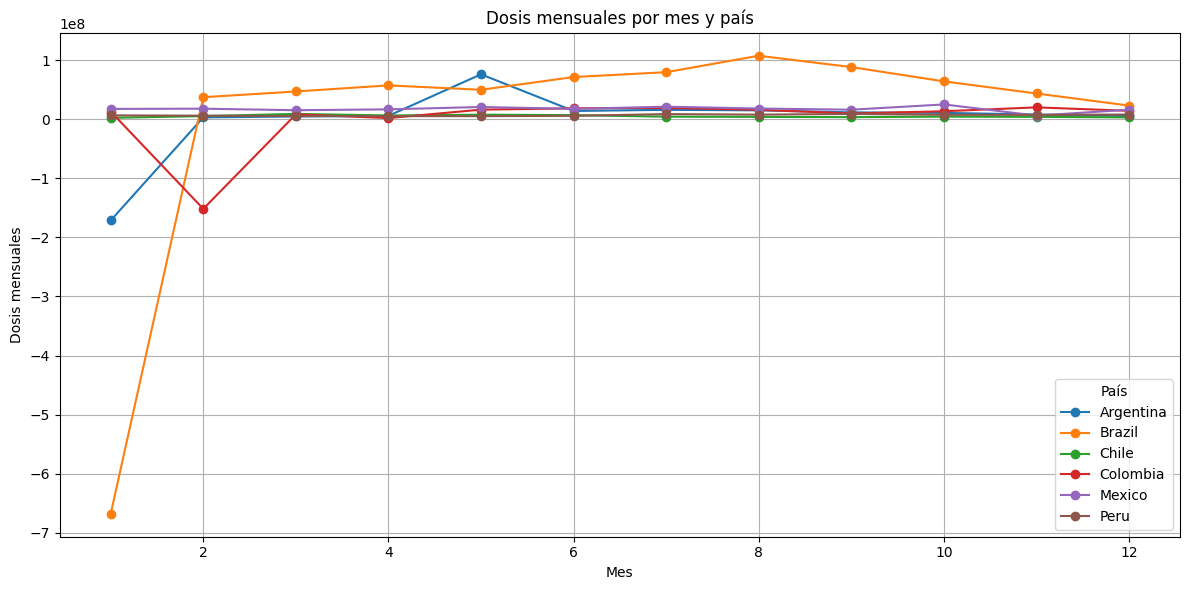

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que el índice sea datetime
df_bio.index = pd.to_datetime(df_bio.index)

# Crear columna mes desde el índice
df_bio["mes"] = df_bio.index.month

# Calcular dosis mensuales a partir del acumulado
df_bio["dosis_mensuales"] = df_bio.groupby("country_name")["cumulative_vaccine_doses_administered"].diff()

# Reemplazar NaN del primer registro de cada país por 0
df_bio["dosis_mensuales"] = df_bio["dosis_mensuales"].fillna(0)

# Agrupar por mes y país sumando las dosis mensuales
dosis_por_mes = (
    df_bio.groupby(["mes", "country_name"])["dosis_mensuales"]
          .sum()
          .reset_index()
)

# Graficar
fig, ax = plt.subplots(figsize=(12,6))

for pais in dosis_por_mes["country_name"].unique():
    df_pais = dosis_por_mes[dosis_por_mes["country_name"] == pais].sort_values("mes")
    ax.plot(
        df_pais["mes"],
        df_pais["dosis_mensuales"],
        marker="o",
        label=pais
    )

ax.set_title("Dosis mensuales por mes y país")
ax.set_xlabel("Mes")
ax.set_ylabel("Dosis mensuales")
ax.legend(title="País")
ax.grid(True)

plt.tight_layout()
plt.show()


In [84]:
df_bio.to_csv("DatosFinalesFiltrado2.csv", index=False, encoding="utf-8")

In [85]:
df_bio.head(20)

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina          7,767   
2021-01-03           AR           AR    Argentina          4,934   
2021-01-04           AR           AR    Argentina         13,953   
2021-01-05           AR           AR    Argentina         14,085   
2021-01-06           AR           AR    Argentina         14,496   
2021-01-07           AR           AR    Argentina         13,722   
2021-01-08           AR           AR    Argentina         13,932   
2021-01-09           AR           AR    Argentina          9,959   
2021-01-10           AR           AR    Argentina          5,174   
2021-01-11           AR           AR    Argentina         13,076   
2021-01-12           AR           AR    Argentina         12,787   
2021-01-13           AR           AR    Argentina         13,374   
2021-01-14           AR           AR    Argentina         12,131   
2021-01-15           AR           AR    Argentina         11,384   
2021-01-16           AR           AR    Argentina          8,426   
2021-01-17           AR           AR    Argentina          4,951   
2021-01-18           AR           AR    Argentina         12,019   
2021-01-19           AR           AR    Argentina         12,038   
2021-01-20           AR           AR    Argentina         11,380   
2021-01-21           AR           AR    Argentina         10,402   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166             1,670,634               46,688   
2021-01-03           157             1,675,568               46,845   
2021-01-04           157             1,689,521               47,002   
2021-01-05           160             1,703,606               47,162   
2021-01-06           131             1,718,102               47,293   
2021-01-07           160             1,731,824               47,453   
2021-01-08           162             1,745,756               47,615   
2021-01-09           158             1,755,715               47,773   
2021-01-10           165             1,760,889               47,938   
2021-01-11           170             1,773,965               48,108   
2021-01-12           172             1,786,752               48,280   
2021-01-13           155             1,800,126               48,435   
2021-01-14           149             1,812,257               48,584   
2021-01-15           191             1,823,641               48,775   
2021-01-16           174             1,832,067               48,949   
2021-01-17           180             1,837,018               49,129   
2021-01-18           186             1,849,037               49,315   
2021-01-19           170             1,861,075               49,485   
2021-01-20           194             1,872,455               49,679   
2021-01-21           219             1,882,857               49,898   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                 20,334  44,938,712   
2021-01-03                                 20,529  44,938,712   
2021-01-04                                 25,164  44,938,712   
2021-01-05                                 29,852  44,938,712   
2021-01-06                                 34,162  44,938,712   
2021-01-07                                 42,092  44,938,712   
2021-01-08                                 54,090  44,938,712   
2021-01-09                                 58,552  44,938,712   
2021-01-10                                 59,043  44,938,712   
2021-01-11                                 67,496  44,938,712   
2021-01-12                                 75,681  44,938,712   
2021-01-13                                 82,837  44,938,712   
2021-01-14                               

In [86]:
# Si 'df_bio' tiene el índice como fecha
df_bio = df_bio.reset_index()

# Renombrar la columna si quieres (por defecto se llama 'index')
df_bio.rename(columns={'index': 'date'}, inplace=True)

# Verificar
print(df_bio.head())
print(df_bio.dtypes)


        date location_key country_code country_name  new_confirmed  \
0 2021-01-02           AR           AR    Argentina          7,767   
1 2021-01-03           AR           AR    Argentina          4,934   
2 2021-01-04           AR           AR    Argentina         13,953   
3 2021-01-05           AR           AR    Argentina         14,085   
4 2021-01-06           AR           AR    Argentina         14,496   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166             1,670,634               46,688   
1           157             1,675,568               46,845   
2           157             1,689,521               47,002   
3           160             1,703,606               47,162   
4           131             1,718,102               47,293   

   cumulative_vaccine_doses_administered  population  population_male  \
0                                 20,334  44,938,712       19,523,766   
1                                 20,529  44,938,712       1

In [87]:
# Asignar df_bio2 a df_bio3
df_bio3 = df_bio2.copy()


In [88]:
df_bio3.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina          7,767   
1           AR  2021-01-03           AR    Argentina          4,934   
2           AR  2021-01-04           AR    Argentina         13,953   
3           AR  2021-01-05           AR    Argentina         14,085   
4           AR  2021-01-06           AR    Argentina         14,496   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166             1,670,634               46,688   
1           157             1,675,568               46,845   
2           157             1,689,521               47,002   
3           160             1,703,606               47,162   
4           131             1,718,102               47,293   

   cumulative_vaccine_doses_administered  population  population_male  \
0                                 20,334  44,938,712       19,523,766   
1                                 20,529  44,938,712       19,523,766   
2                                 25,164  44,938,712       19,523,766   
3                                 29,852  44,938,712       19,523,766   
4                                 34,162  44,938,712       19,523,766   

   population_female  population_rural  population_urban  population_density  \
0         20,593,330         3,599,141        41,339,571                  17   
1         20,593,330         3,599,141        41,339,571                  17   
2         20,593,330         3,599,141        41,339,571                  17   
3         20,593,330         3,599,141        41,339,571                  17   
4         20,593,330         3,599,141        41,339,571                  17   

   human_development_index  population_age_00_09  population_age_10_19  \
0                        1             6,718,871             7,045,513   
1                        1             6,718,871             7,045,513   
2                        1             6,718,871             7,045,513   
3                        1             6,718,871             7,045,513   
4                        1             6,718,871             7,045,513   

   population_age_20_29  population_age_30_39  population_age_40_49  \
0             6,430,658             5,777,148             4,507,125   
1             6,430,658             5,777,148             4,507,125   
2             6,430,658             5,777,148             4,507,125   
3             6,430,658             5,777,148             4,507,125   
4             6,430,658             5,777,148             4,507,125   

   population_age_50_59  population_age_60_69  population_age_70_79  \
0             3,911,943             2,914,251             1,817,557   
1             3,911,943             2,914,251             1,817,557   
2             3,911,943             2,914,251             1,817,557   
3             3,911,943             2,914,251             1,817,557   
4             3,911,943             2,914,251             1,817,557   

   population_age_80_and_older         gdp_usd  gdp_per_capita_usd  latitude  \
0                      994,030 449,663,446,954              10,006       -34   
1                      994,030 449,663,446,954              10,006       -34   
2                      994,030 449,663,446,954              10,006       -34   
3                      994,030 449,663,446,954              10,006       -34   
4                      994,030 449,663,446,954              10,006       -34   

   longitude  area_sq_km  smoking_prevalence  diabetes_prevalence  \
0        -64   2,780,400                  22                    6   
1        -64   2,780,400                  22                    6   
2        -64   2,780,400                  22                    6   
3        -64   2,780,400                  22                    6   
4        -64   2,780,400                  22                    6   

   infant_mortality_rate  nurses_per_1000  physicians_per_1000  \
0                    

In [89]:
df_bio.to_csv("DatosFinalesFiltrado3.csv", index=False, encoding="utf-8")